# **Covid19 Time Series Project**

# import all important libraries



In [ ]:
import numpy as np
import pandas as pd #numpy and pandas are for numerical computaion and manipulation

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors #matplotlib is for visiualizing the data and type
import random
import math
import time
import xgboost 
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
plt.show()
#%matplotlib inline

# Load all the three datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Data from COVID-19 time series

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series/

In [ ]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## COVID-19 Daily Reports

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

In [ ]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-21-2021.csv')

## Display the head of the dataset


In [ ]:
confirmed_cases.head()

Province/State Country/Region       Lat  ...  5/19/21  5/20/21  5/21/21
0            NaN    Afghanistan  33.93911  ...    64122    64575    65080
1            NaN        Albania  41.15330  ...   132095   132118   132153
2            NaN        Algeria  28.03390  ...   125896   126156   126434
3            NaN        Andorra  42.50630  ...    13569    13569    13569
4            NaN         Angola -11.20270  ...    31438    31661    31909

[5 rows x 490 columns]

In [ ]:
deaths_reported.head()

Province/State Country/Region       Lat  ...  5/19/21  5/20/21  5/21/21
0            NaN    Afghanistan  33.93911  ...     2762     2772     2782
1            NaN        Albania  41.15330  ...     2438     2440     2441
2            NaN        Algeria  28.03390  ...     3395     3401     3405
3            NaN        Andorra  42.50630  ...      127      127      127
4            NaN         Angola -11.20270  ...      696      704      709

[5 rows x 490 columns]

In [ ]:
recovered_cases.head()

Province/State Country/Region       Lat  ...  5/19/21  5/20/21  5/21/21
0            NaN    Afghanistan  33.93911  ...    55529    55687    55790
1            NaN        Albania  41.15330  ...   127240   127869   128425
2            NaN        Algeria  28.03390  ...    87746    87902    88066
3            NaN        Andorra  42.50630  ...    13234    13234    13234
4            NaN         Angola -11.20270  ...    26458    26483    26513

[5 rows x 490 columns]

## Extracting all the columns using the .keys() function

In [ ]:
cols = confirmed_cases.keys()
print(cols)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/12/21', '5/13/21', '5/14/21', '5/15/21', '5/16/21', '5/17/21',
       '5/18/21', '5/19/21', '5/20/21', '5/21/21'],
      dtype='object', length=490)


## Extracting only the dates columns that have information of confirmed, deaths and recovered cases

In [ ]:
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
print(confirmed)

     1/22/20  1/23/20  1/24/20  1/25/20  ...  5/18/21  5/19/21  5/20/21  5/21/21
0          0        0        0        0  ...    63819    64122    64575    65080
1          0        0        0        0  ...   132071   132095   132118   132153
2          0        0        0        0  ...   125693   125896   126156   126434
3          0        0        0        0  ...    13569    13569    13569    13569
4          0        0        0        0  ...    31045    31438    31661    31909
..       ...      ...      ...      ...  ...      ...      ...      ...      ...
270        0        2        2        2  ...     4512     4720     4809     4941
271        0        0        0        0  ...   304074   304532   304532   304968
272        0        0        0        0  ...     6586     6593     6613     6632
273        0        0        0        0  ...    92520    92630    92754    92920
274        0        0        0        0  ...    38595    38612    38635    38664

[275 rows x 486 columns]


In [ ]:
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
print(deaths)

     1/22/20  1/23/20  1/24/20  1/25/20  ...  5/18/21  5/19/21  5/20/21  5/21/21
0          0        0        0        0  ...     2751     2762     2772     2782
1          0        0        0        0  ...     2436     2438     2440     2441
2          0        0        0        0  ...     3388     3395     3401     3405
3          0        0        0        0  ...      127      127      127      127
4          0        0        0        0  ...      685      696      704      709
..       ...      ...      ...      ...  ...      ...      ...      ...      ...
270        0        0        0        0  ...       37       37       39       41
271        0        0        0        0  ...     3437     3448     3448     3452
272        0        0        0        0  ...     1297     1298     1301     1302
273        0        0        0        0  ...     1263     1263     1265     1266
274        0        0        0        0  ...     1583     1583     1585     1586

[275 rows x 486 columns]


In [ ]:
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]
print(recoveries)

     1/22/20  1/23/20  1/24/20  1/25/20  ...  5/18/21  5/19/21  5/20/21  5/21/21
0          0        0        0        0  ...    55118    55529    55687    55790
1          0        0        0        0  ...   126405   127240   127869   128425
2          0        0        0        0  ...    87609    87746    87902    88066
3          0        0        0        0  ...    13234    13234    13234    13234
4          0        0        0        0  ...    26013    26458    26483    26513
..       ...      ...      ...      ...  ...      ...      ...      ...      ...
255        0        0        0        0  ...     2687     2687     2687     2689
256        0        0        0        0  ...   293808   295643   295643   296901
257        0        0        0        0  ...     3072     3120     3159     3179
258        0        0        0        0  ...    90892    90919    90955    91019
259        0        0        0        0  ...    36371    36416    36427    36435

[260 rows x 486 columns]


## Check the head of the outbreak cases

In [ ]:
confirmed.head()

1/22/20  1/23/20  1/24/20  1/25/20  ...  5/18/21  5/19/21  5/20/21  5/21/21
0        0        0        0        0  ...    63819    64122    64575    65080
1        0        0        0        0  ...   132071   132095   132118   132153
2        0        0        0        0  ...   125693   125896   126156   126434
3        0        0        0        0  ...    13569    13569    13569    13569
4        0        0        0        0  ...    31045    31438    31661    31909

[5 rows x 486 columns]

In [ ]:
latest_data.describe()

FIPS          Lat  ...  Incident_Rate  Case_Fatality_Ratio
count   3266.000000  3895.000000  ...    3895.000000          3941.000000
mean   32401.272811    35.985508  ...    8866.383049             2.036821
std    18033.806874    13.024749  ...    3931.547071             2.692665
min       66.000000   -52.368000  ...       0.000000             0.000000
25%    19049.500000    33.269320  ...    6869.721174             1.213242
50%    30068.000000    37.952303  ...    9494.748794             1.764959
75%    47040.500000    42.224242  ...   11347.533118             2.485284
max    99999.000000    71.706900  ...   38195.654167           124.825157

[8 rows x 9 columns]

In [ ]:
latest_data.head()

FIPS Admin2 Province_State  ... Combined_Key Incident_Rate  Case_Fatality_Ratio
0   NaN    NaN            NaN  ...  Afghanistan    167.178971             4.274739
1   NaN    NaN            NaN  ...      Albania   4592.153729             1.847101
2   NaN    NaN            NaN  ...      Algeria    288.326095             2.693105
3   NaN    NaN            NaN  ...      Andorra  17561.638517             0.935957
4   NaN    NaN            NaN  ...       Angola     97.087385             2.221944

[5 rows x 14 columns]

### Finding the total confirmed cases, death cases and the recovered cases and append them to a 4 empty lists   

### Also, calculate the total mortality rate which is the death_sum /  confirmed cases 

In [ ]:
confirmed_sum = ()
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []

china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = [] 

china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []

china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = [] 


for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()

    #confirmed, death, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_active.append(confirmed_sum - recovered_sum - death_sum)

    #calculate rate
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

    #case studies
    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())

    #individual country deaths reported
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())

    #individual country recovered cases
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    


#getting daily increase

In [ ]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 
# confirmed cases
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
russia_daily_increase = daily_increase(russia_cases)

# deaths
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
russia_daily_death = daily_increase(russia_deaths)

# recoveries
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
russia_daily_recovery = daily_increase(russia_recoveries)

## Let's display each of the newly created variables

In [ ]:
confirmed_sum


166139027

In [ ]:
death_sum

3442873

In [ ]:
recovered_sum

102496978

In [ ]:
world_cases

[557,
 655,
 941,
 1433,
 2118,
 2927,
 5578,
 6167,
 8235,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30803,
 34396,
 37130,
 40160,
 42769,
 44811,
 45229,
 60382,
 66909,
 69052,
 71235,
 73270,
 75152,
 75652,
 76212,
 76841,
 78602,
 78982,
 79546,
 80399,
 81376,
 82736,
 84122,
 86013,
 88394,
 90377,
 92971,
 95279,
 98090,
 102003,
 106098,
 110047,
 114219,
 119041,
 126702,
 132492,
 146876,
 157950,
 169219,
 184027,
 199970,
 219535,
 246584,
 277359,
 309350,
 344205,
 387040,
 428219,
 479220,
 542097,
 607138,
 674418,
 733655,
 798949,
 875794,
 958602,
 1041662,
 1125221,
 1183584,
 1256176,
 1329331,
 1399162,
 1482540,
 1569554,
 1655088,
 1729371,
 1849067,
 1919809,
 2003820,
 2080934,
 2176465,
 2264462,
 2341702,
 2418307,
 2494325,
 2570074,
 2651321,
 2735570,
 2819666,
 2901925,
 2973513,
 3043705,
 3119245,
 3196355,
 3279850,
 3368226,
 3447426,
 3523799,
 3601488,
 3681990,
 3772018,
 3860724,
 3951003,
 4036226,
 4111202,
 4187833,
 4272324,
 4357304

## Convert all the dates and the cases in the form of a numpy array

In [ ]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [ ]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
world_cases

array([[      557],
       [      655],
       [      941],
       [     1433],
       [     2118],
       [     2927],
       [     5578],
       [     6167],
       [     8235],
       [     9927],
       [    12038],
       [    16787],
       [    19887],
       [    23898],
       [    27643],
       [    30803],
       [    34396],
       [    37130],
       [    40160],
       [    42769],
       [    44811],
       [    45229],
       [    60382],
       [    66909],
       [    69052],
       [    71235],
       [    73270],
       [    75152],
       [    75652],
       [    76212],
       [    76841],
       [    78602],
       [    78982],
       [    79546],
       [    80399],
       [    81376],
       [    82736],
       [    84122],
       [    86013],
       [    88394],
       [    90377],
       [    92971],
       [    95279],
       [    98090],
       [   102003],
       [   106098],
       [   110047],
       [   114219],
       [   119041],
       [   126702],


In [ ]:
total_deaths

array([[     17],
       [     18],
       [     26],
       [     42],
       [     56],
       [     82],
       [    131],
       [    133],
       [    171],
       [    213],
       [    259],
       [    362],
       [    426],
       [    492],
       [    564],
       [    634],
       [    719],
       [    806],
       [    906],
       [   1013],
       [   1113],
       [   1118],
       [   1371],
       [   1523],
       [   1666],
       [   1770],
       [   1868],
       [   2008],
       [   2123],
       [   2248],
       [   2252],
       [   2459],
       [   2470],
       [   2630],
       [   2710],
       [   2771],
       [   2814],
       [   2873],
       [   2942],
       [   2996],
       [   3085],
       [   3160],
       [   3255],
       [   3349],
       [   3460],
       [   3564],
       [   3803],
       [   3993],
       [   4267],
       [   4611],
       [   4917],
       [   5414],
       [   5834],
       [   6475],
       [   7153],
       [  

In [ ]:
total_recovered

array([[       30],
       [       32],
       [       39],
       [       42],
       [       56],
       [       65],
       [      108],
       [      127],
       [      145],
       [      225],
       [      287],
       [      476],
       [      627],
       [      857],
       [     1129],
       [     1492],
       [     2016],
       [     2616],
       [     3245],
       [     3947],
       [     4684],
       [     5151],
       [     6294],
       [     8057],
       [     9396],
       [    10866],
       [    12583],
       [    14352],
       [    16121],
       [    18179],
       [    18892],
       [    22889],
       [    23394],
       [    25227],
       [    27905],
       [    30386],
       [    33278],
       [    36710],
       [    39781],
       [    42717],
       [    45601],
       [    48227],
       [    51169],
       [    53795],
       [    55863],
       [    58357],
       [    60694],
       [    62493],
       [    64400],
       [    66998],


## Future forecasting for the next 10 days

In [ ]:
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

In [ ]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

## Convert all the integers into datetime for better visualization

In [ ]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

### For visualization with the latest data of March

In [ ]:
latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [ ]:
latest_confirmed

0       65080
1      132153
2      126434
3       13569
4       31909
        ...  
270      4941
271    304968
272      6632
273     92920
274     38664
Name: 5/21/21, Length: 275, dtype: int64

In [ ]:
latest_deaths

0      2782
1      2441
2      3405
3       127
4       709
       ... 
270      41
271    3452
272    1302
273    1266
274    1586
Name: 5/21/21, Length: 275, dtype: int64

In [ ]:
latest_recoveries

0       55790
1      128425
2       88066
3       13234
4       26513
        ...  
255      2689
256    296901
257      3179
258     91019
259     36435
Name: 5/21/21, Length: 260, dtype: int64

### Find the list of unique countries

In [ ]:
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

### The next line of code will basically calculate the total number of confirmed cases by each country

In [ ]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    unique_countries.remove(i)

unique_countries = [k for k,v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1),reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i]=latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()                                        

### Number of cases per country/region

In [ ]:
print('Confirmed Cases by Country/region:')
for i in range(len(unique_countries)):
  print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Country/region:
US: 33085106 cases
India: 26289290 cases
Brazil: 15970949 cases
France: 5979369 cases
Turkey: 5169951 cases
Russia: 4926717 cases
United Kingdom: 4473773 cases
Italy: 4183476 cases
Germany: 3646600 cases
Spain: 3636453 cases
Argentina: 3482512 cases
Colombia: 3192050 cases
Poland: 2863031 cases
Iran: 2815882 cases
Mexico: 2392744 cases
Ukraine: 2232510 cases
Peru: 1910360 cases
Indonesia: 1758898 cases
Czechia: 1656874 cases
Netherlands: 1646781 cases
South Africa: 1628335 cases
Canada: 1360264 cases
Chile: 1315913 cases
Philippines: 1171403 cases
Iraq: 1160494 cases
Romania: 1074781 cases
Sweden: 1058341 cases
Belgium: 1044612 cases
Pakistan: 897468 cases
Portugal: 844288 cases
Israel: 839290 cases
Hungary: 801025 cases
Bangladesh: 786698 cases
Jordan: 726432 cases
Japan: 710895 cases
Serbia: 709269 cases
Switzerland: 686152 cases
Austria: 640293 cases
United Arab Emirates: 552920 cases
Lebanon: 537887 cases
Morocco: 516449 cases
Malaysia: 498795 cas

### Find the list of unique provinces

In [ ]:
unique_provinces=list(confirmed_cases['Province/State'].unique())
unique_provinces

[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Diamond Princess',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Nunavut',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Repatriated Travellers',
 'Saskatchewan',
 'Yukon',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Unknown',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Martinique',
 'Mayotte',
 'New Caledonia',
 'Reu

### finding the number of confirmed cases per province, state or city

In [ ]:
province_confirmed_cases=[]
no_cases=[]
for i in unique_provinces:
    caes=latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases>0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    unique_provinces.remove(i)

### number of cases per province/state/city

In [ ]:
for i in range(len(unique_provinces)):
    print(f"{unique_provinces[i]}:{province_confirmed_cases[i]} cases")

nan:38664 cases
Australian Capital Territory:38664 cases
New South Wales:38664 cases
Northern Territory:38664 cases
Queensland:38664 cases
South Australia:38664 cases
Tasmania:38664 cases
Victoria:38664 cases
Western Australia:38664 cases
Alberta:38664 cases
British Columbia:38664 cases
Diamond Princess:38664 cases
Grand Princess:38664 cases
Manitoba:38664 cases
New Brunswick:38664 cases
Newfoundland and Labrador:38664 cases
Northwest Territories:38664 cases
Nova Scotia:38664 cases
Nunavut:38664 cases
Ontario:38664 cases
Prince Edward Island:38664 cases
Quebec:38664 cases
Repatriated Travellers:38664 cases
Saskatchewan:38664 cases
Yukon:38664 cases
Anhui:38664 cases
Beijing:38664 cases
Chongqing:38664 cases
Fujian:38664 cases
Gansu:38664 cases
Guangdong:38664 cases
Guangxi:38664 cases
Guizhou:38664 cases
Hainan:38664 cases
Hebei:38664 cases
Heilongjiang:38664 cases
Henan:38664 cases
Hong Kong:38664 cases
Hubei:38664 cases
Hunan:38664 cases
Inner Mongolia:38664 cases
Jiangsu:38664 cases

### handling nan if there any

In [ ]:
nan_indices=[]
for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)
unique_provinces=list(unique_provinces)
provinces_confirmed_cases=list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    provinces_confirmed_cases.pop(i)

### Plot a bar graph to see different the total confirmed cases across different  countries

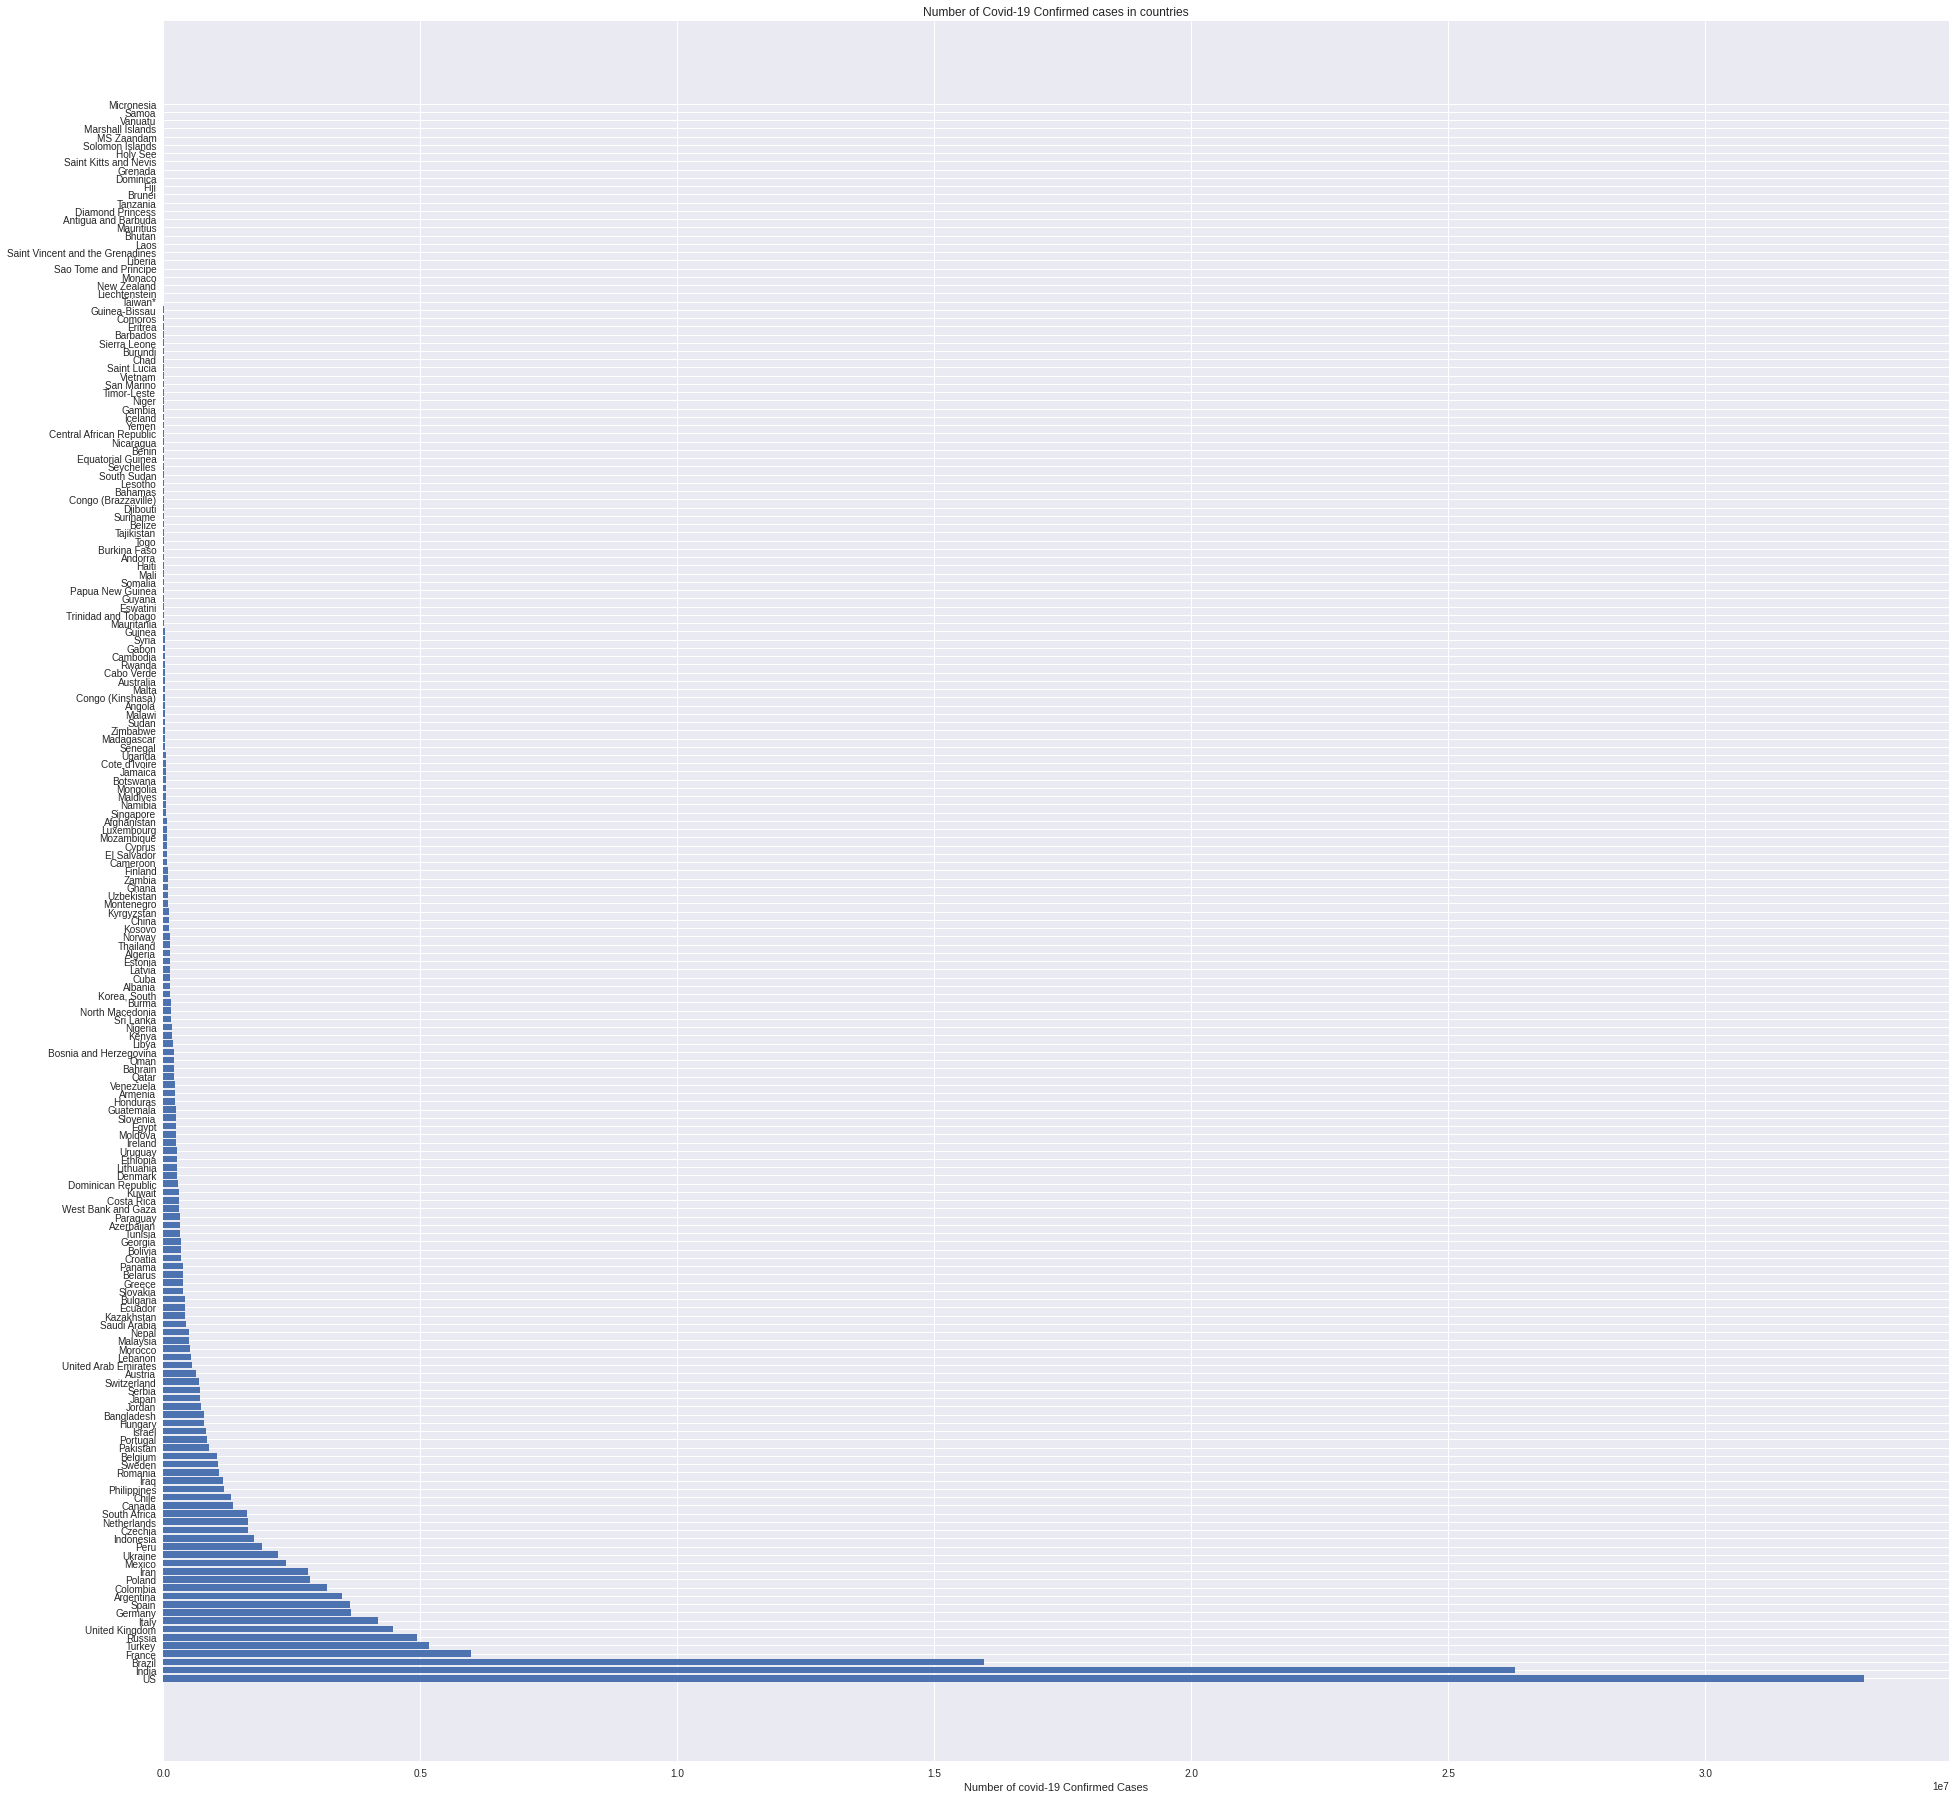

In [ ]:
plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed cases in countries')
plt.xlabel('Number of covid-19 Confirmed Cases')
plt.show()

### Plot the bar graph to see the total number of confirmed cases between mainland china and outside mainland china

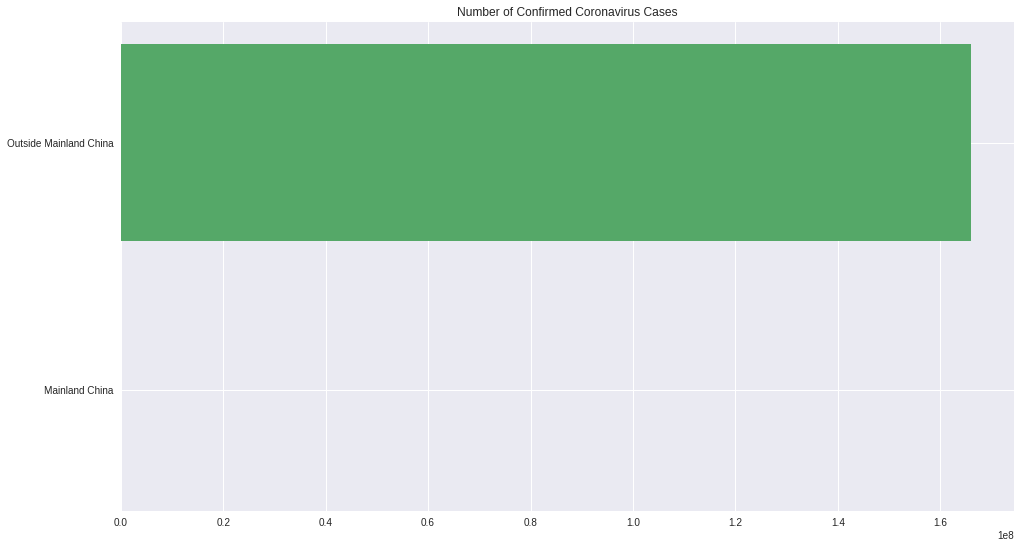

In [ ]:
china_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16, 9))
plt.barh('Mainland China', china_confirmed)
plt.barh('Outside Mainland China', outside_mainland_china_confirmed)
plt.title('Number of Confirmed Coronavirus Cases')
plt.show()

### Print the total cases in mainland china and outside of it

In [ ]:
print('Outside Mainland China: {} cases'.format(outside_mainland_china_confirmed))
print('Mainland China: {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed + outside_mainland_china_confirmed))

Outside Mainland China: 166036194 cases
Mainland China: 102833 cases
Total: 166139027 cases


### Only show 10 countries with the most confirmed cases, the rest are grouped into the category named others

In [ ]:
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
  visual_unique_countries.append(unique_countries[i])
  visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

### Visualize the 10 countries

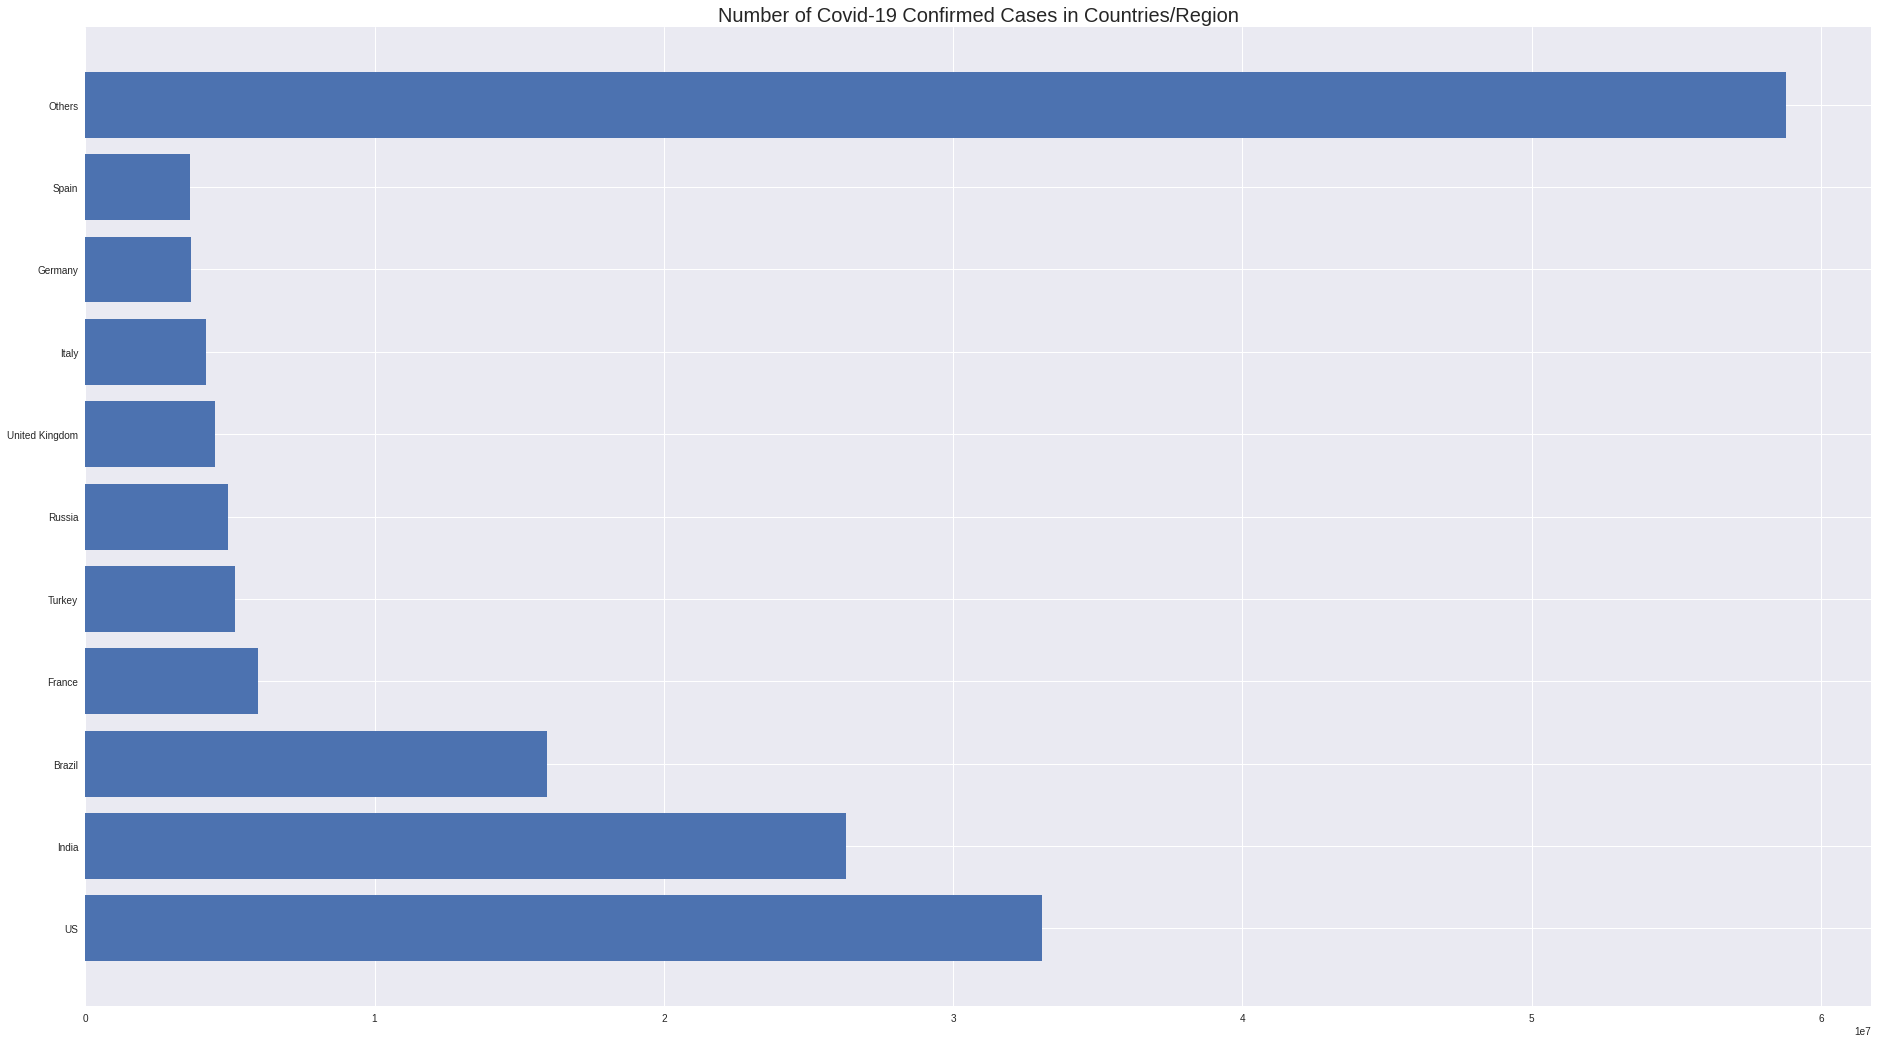

In [ ]:
plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Region', size=20)
plt.show()

### Create a pie chart to see the total confirmed cases in 10 different countries

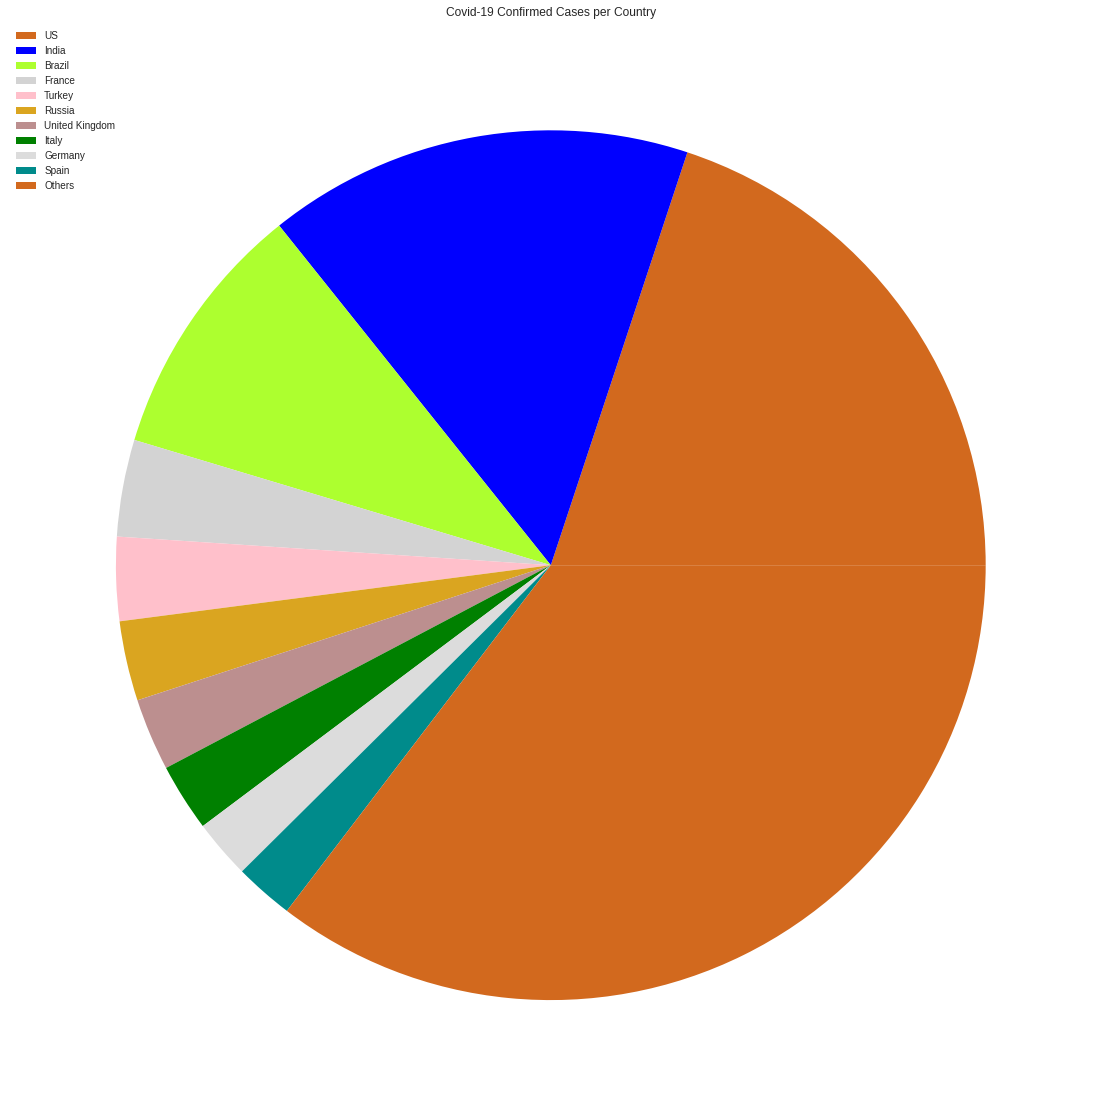

In [ ]:
c = random.choices(list(mcolors.CSS4_COLORS.values()), k = len(unique_countries))
plt.figure(figsize=(20, 20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

### Create a pie chart to see the total confirmed cases in 10 different countries outside US

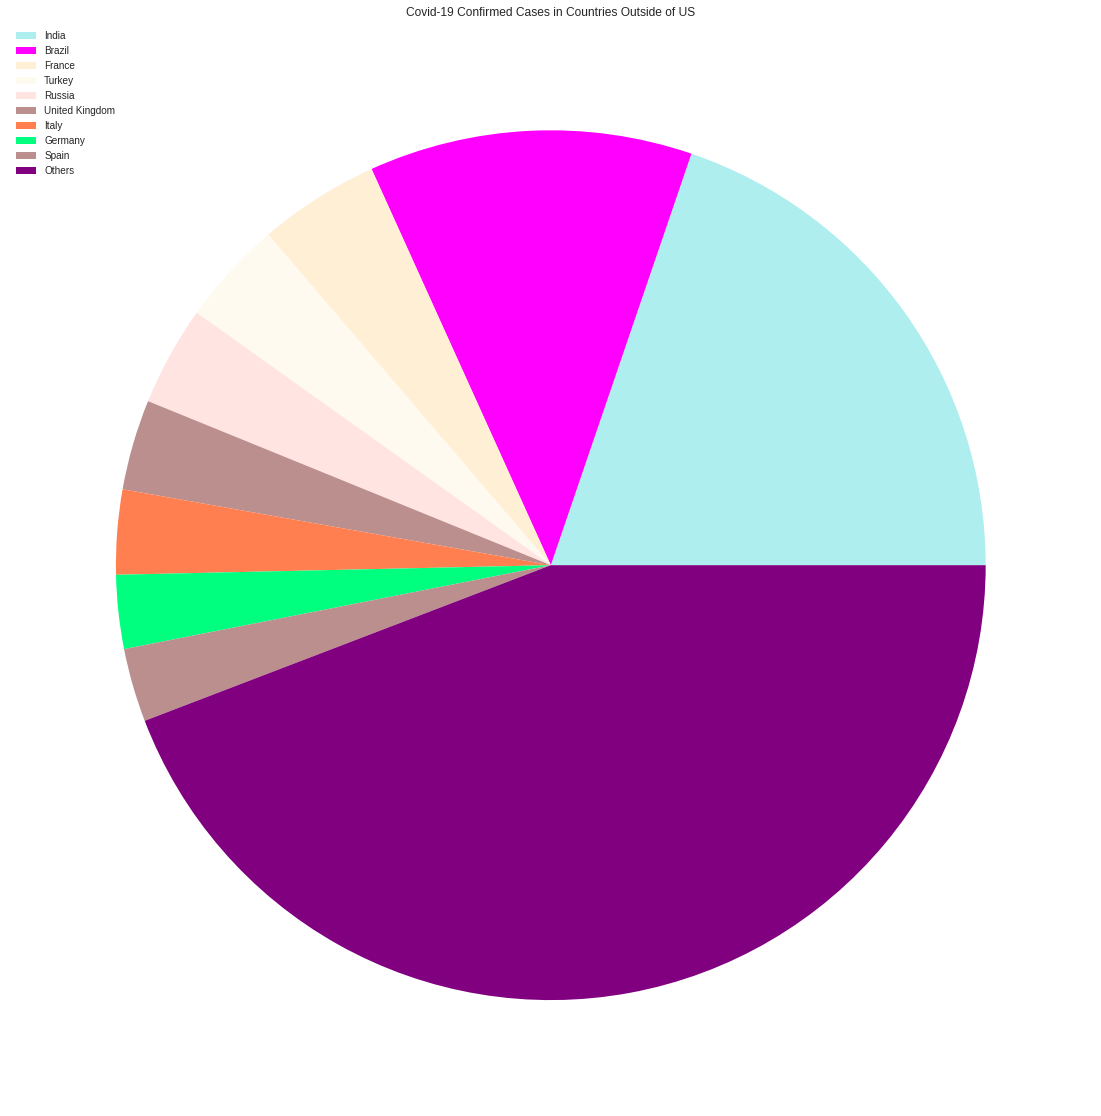

In [ ]:
c = random.choices(list(mcolors.CSS4_COLORS.values()), k = len(unique_countries))
plt.figure(figsize=(20, 20))
plt.title('Covid-19 Confirmed Cases in Countries Outside of US')
plt.pie(visual_confirmed_cases[1:], colors=c)
plt.legend(visual_unique_countries[1:], loc='best')
plt.show()

### Splitting the dataset to test set and train set


In [ ]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.36, shuffle=False)

### Building the linear Regression Algorithm, polynomial regression and bayesian ridge

---




In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)

In [ ]:
linear_pred = linear_model.predict(future_forecast)

In [ ]:
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 52187781.42391939
MSE: 3090062377658424.5


In [ ]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forecast)

bayesian_poly = PolynomialFeatures(degree=4)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forecast)

In [ ]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 11727521.922746575
MSE: 232964192300376.72


In [ ]:
print(linear_model.coef_)

[[-1.99295954e+05 -2.28227203e+03  2.37685510e+02  1.27163516e+00]]


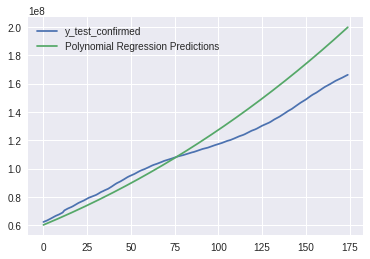

In [ ]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['y_test_confirmed', 'Polynomial Regression Predictions'])

In [ ]:
from sklearn.linear_model import  BayesianRidge
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=False,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                  

In [ ]:
bayesian_search.best_params_

{'alpha_1': 1e-06,
 'alpha_2': 0.001,
 'lambda_1': 0.001,
 'lambda_2': 0.001,
 'normalize': True,
 'tol': 0.001}

In [ ]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 13334880.36416611
MSE: 318552413902119.56


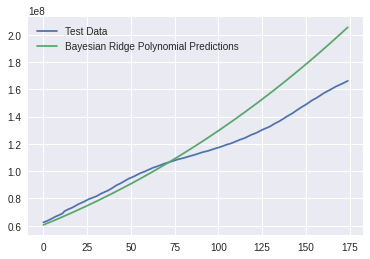

In [ ]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])
plt.show()

### Graphing the number of confirmed cases, active cases, deaths, recoveries, mortality rate, and recovery rate

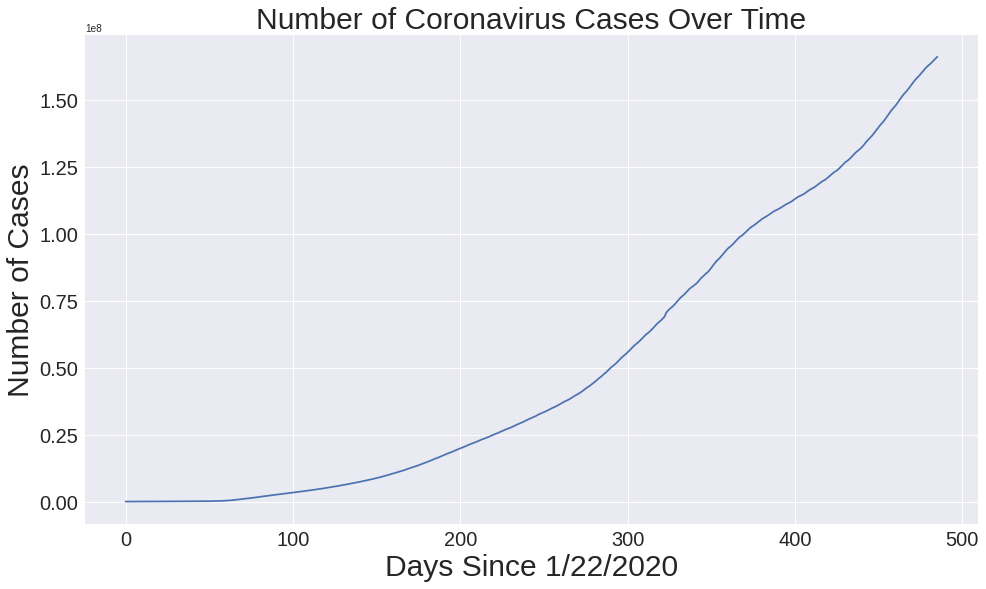

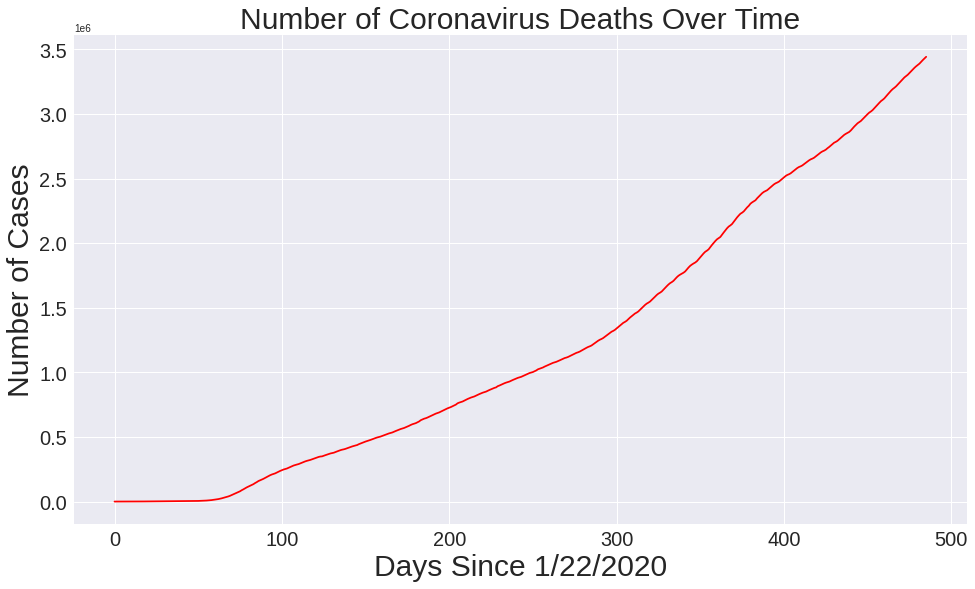

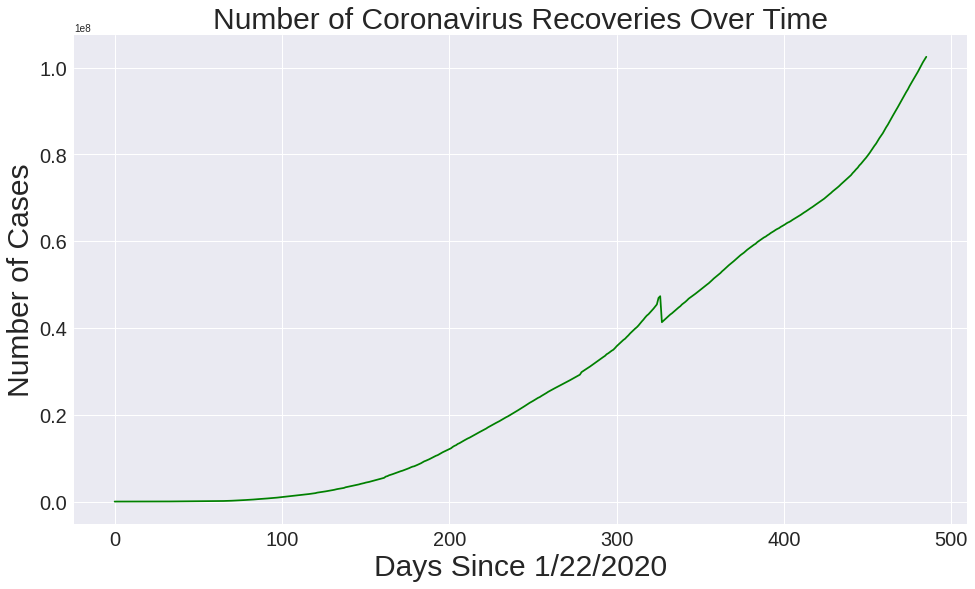

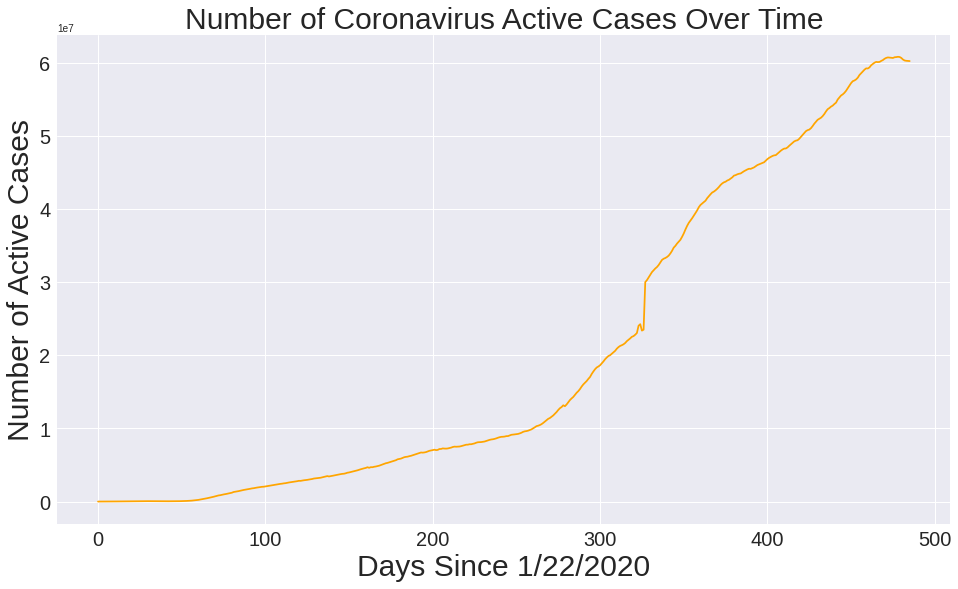

In [ ]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Number of Coronavirus Deaths Over Time', size=30,)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active, color='orange')
plt.title('Number of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### world daily increases in confirmed cases, confirmed deaths, confirmed recoveries

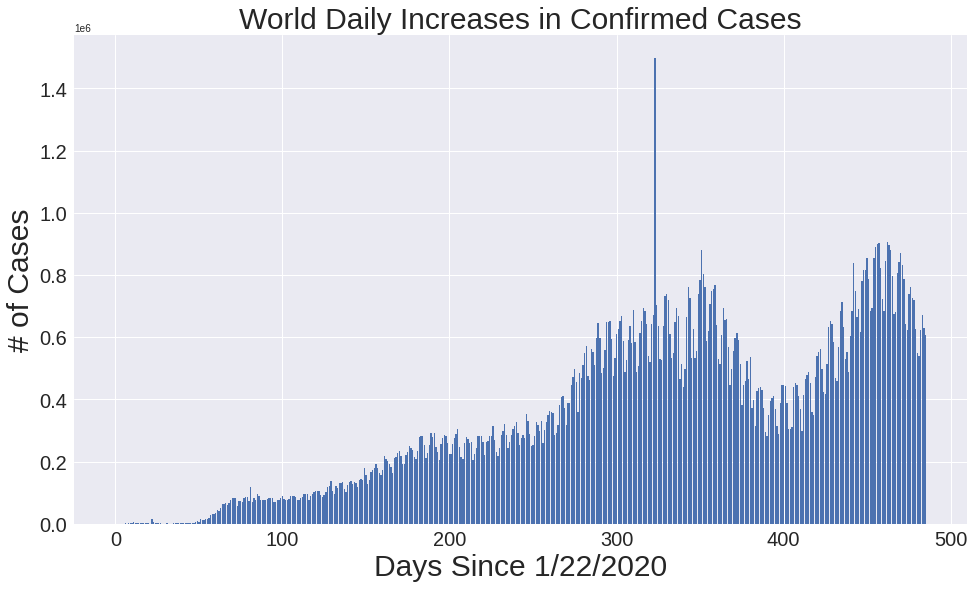

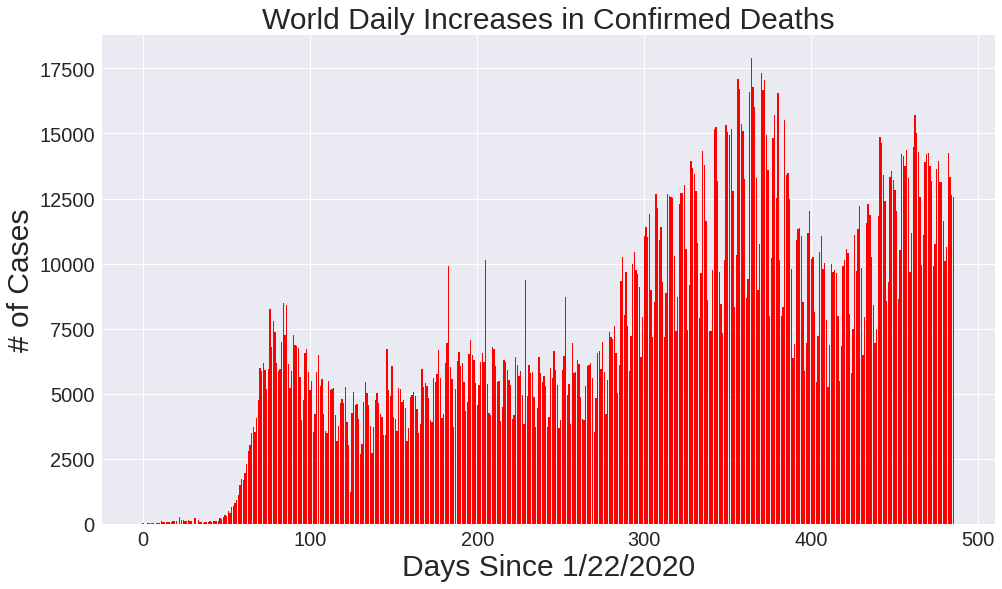

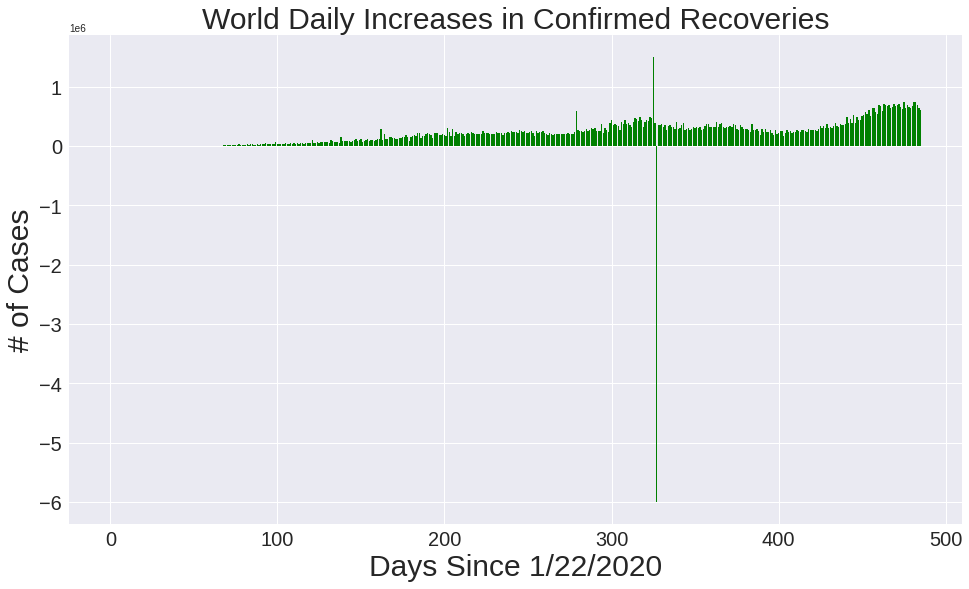

In [ ]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_death, color='red')
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_recovery, color='green')
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
total_active    = (np.array(world_cases)-np.array(total_deaths)-np.array(total_recovered)).tolist()


In [ ]:
covid_df = pd.DataFrame(
    {'Confirmed': world_cases,
     'Deaths'   : total_deaths,
     'Recovered': total_recovered,
     'Active'   : total_active
    }, index=future_forecast_dates)
covid_df.plot(figsize=(16, 9), linewidth=4).grid(axis='y')
plt.title('Coronavirus Over Time', size=30);

Exception: ignored

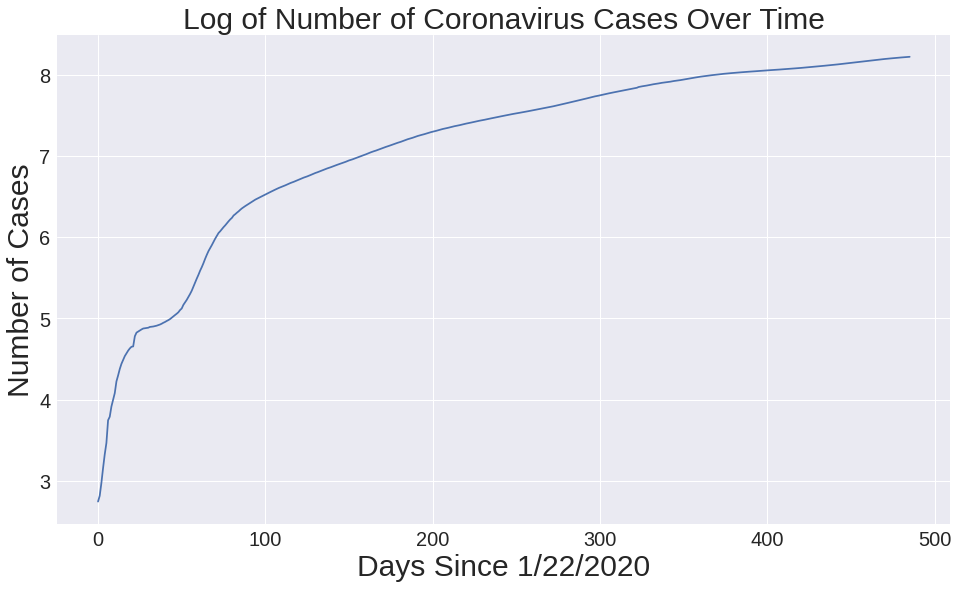

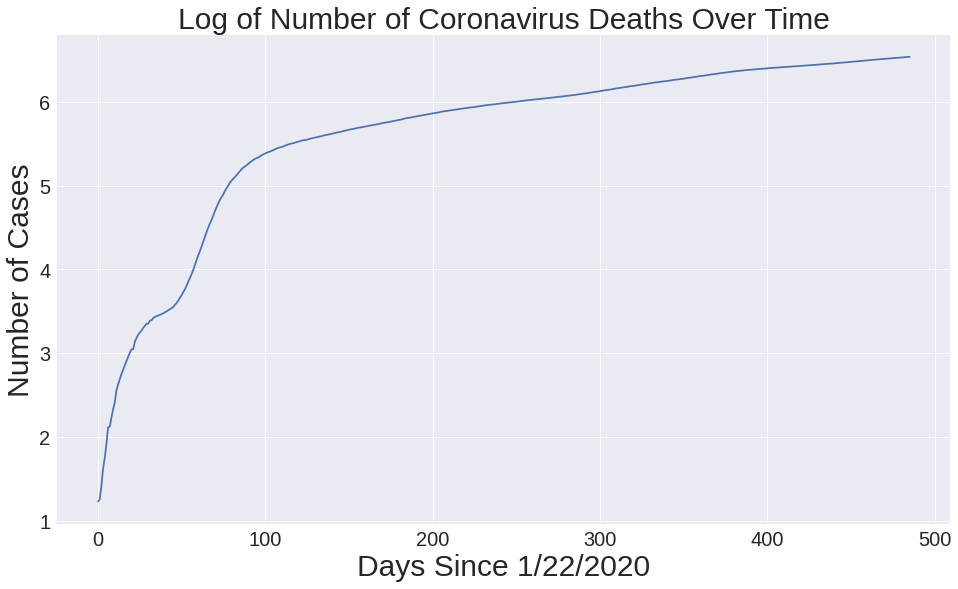

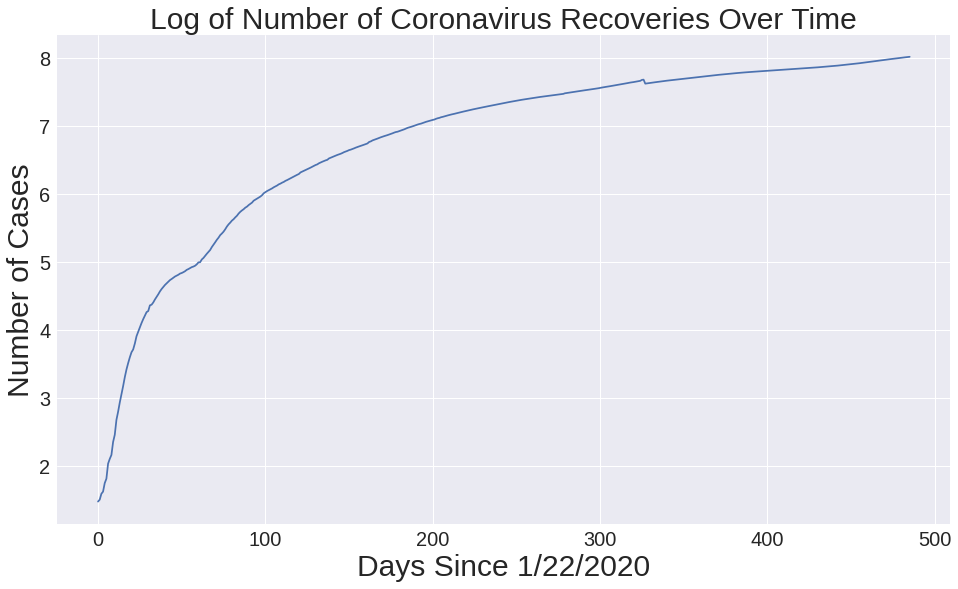

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.title('Log of Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, np.log10(total_recovered))
plt.title('Log of Number of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### showcovid19 confirmed, deaths and recoveries for different country

In [ ]:
def country_plot(x, y1, y2, y3, y4, country):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y1)
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y2)
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y3, color='red')
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(x, y4, color='green')
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

### country specific graph

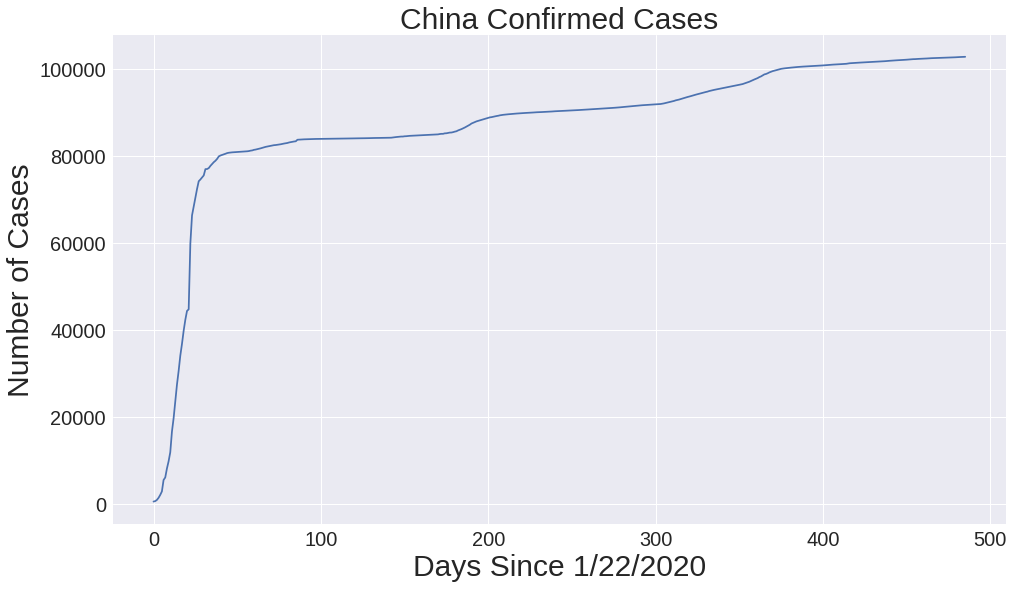

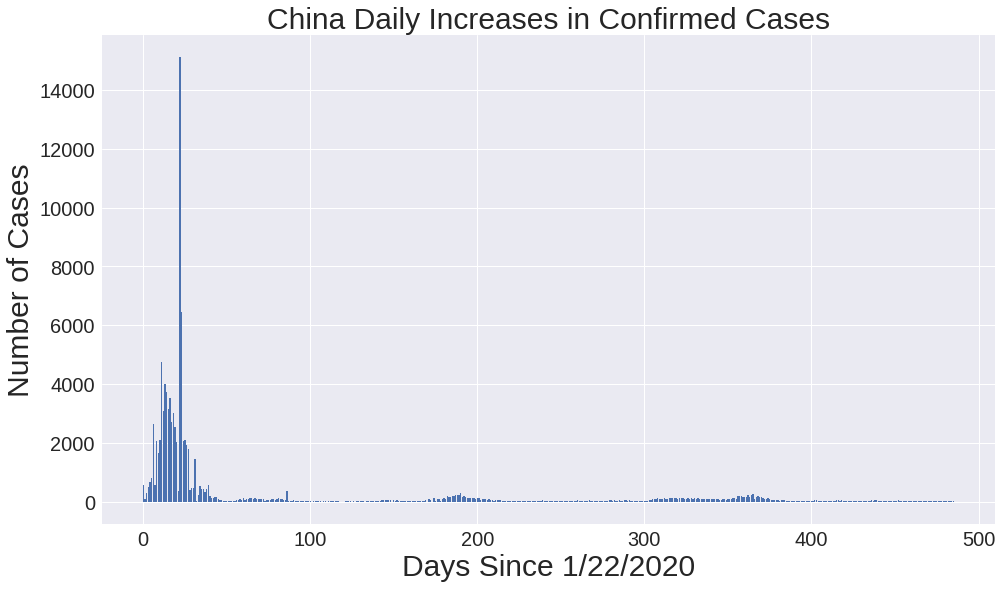

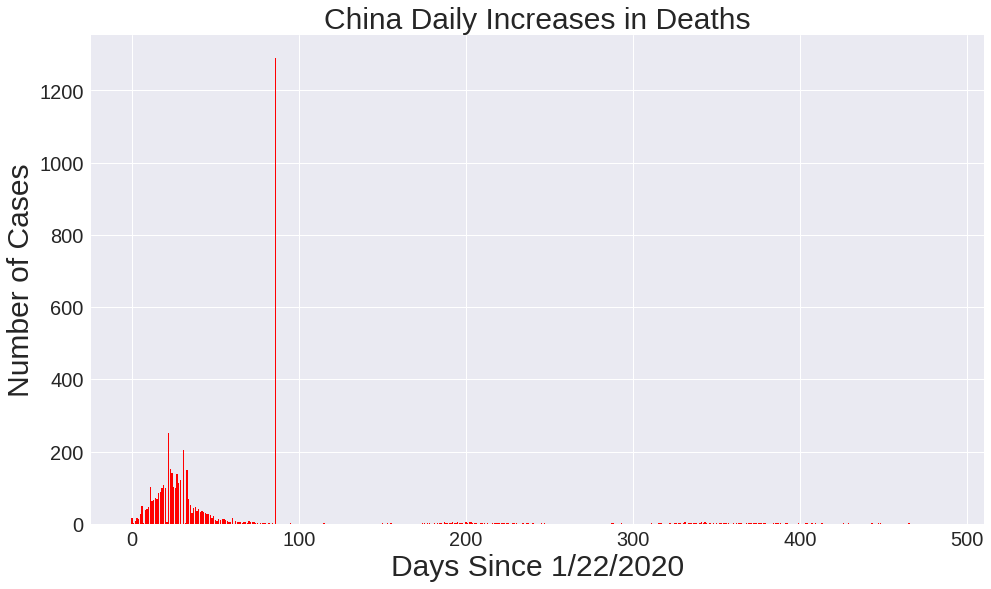

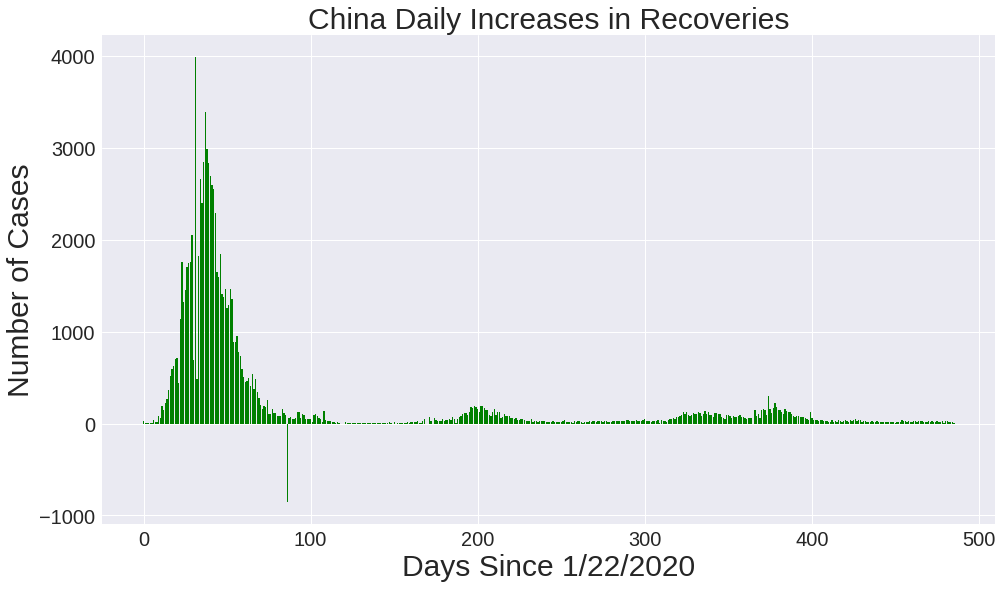

In [ ]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_death, china_daily_recovery, 'China')

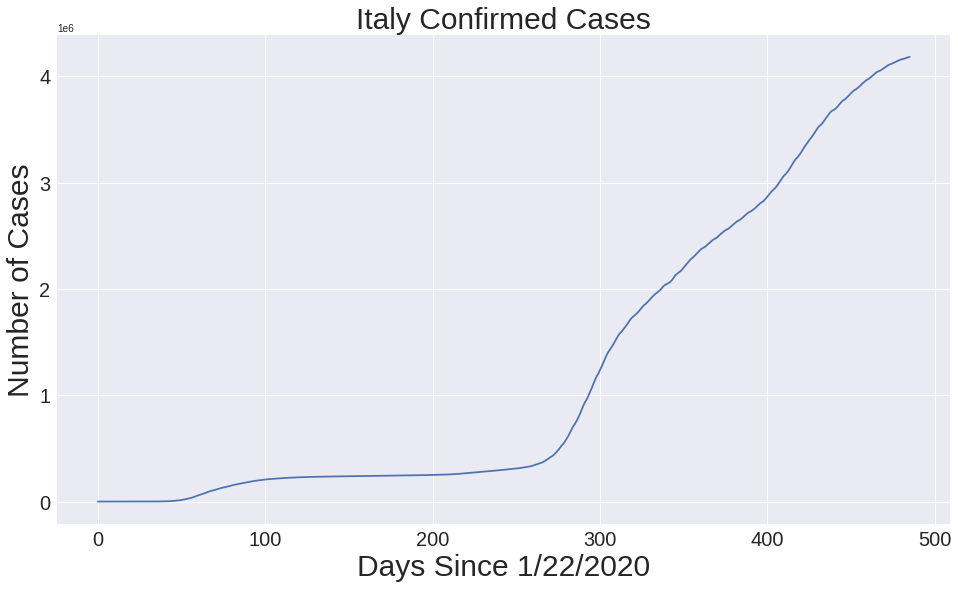

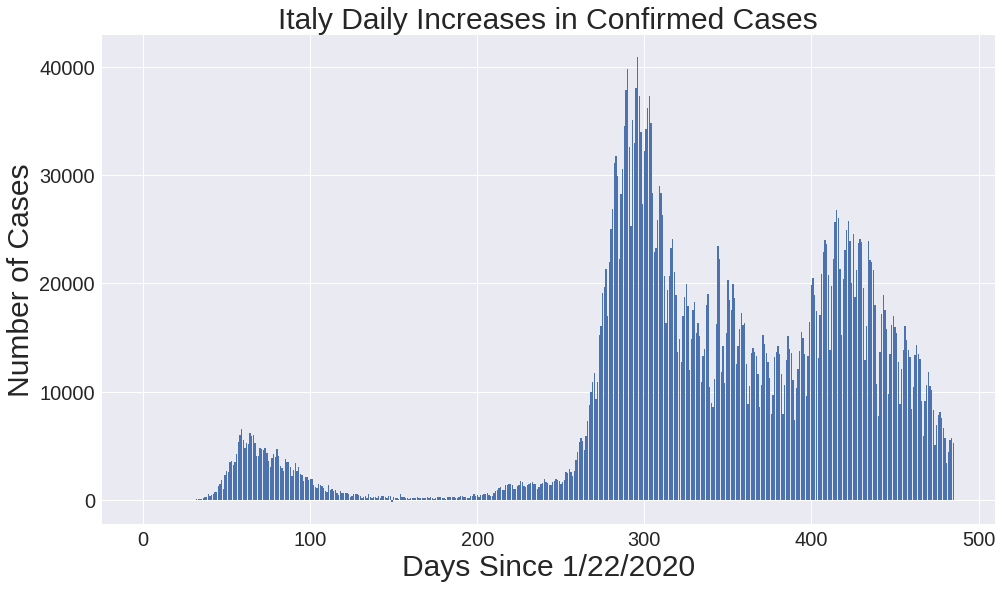

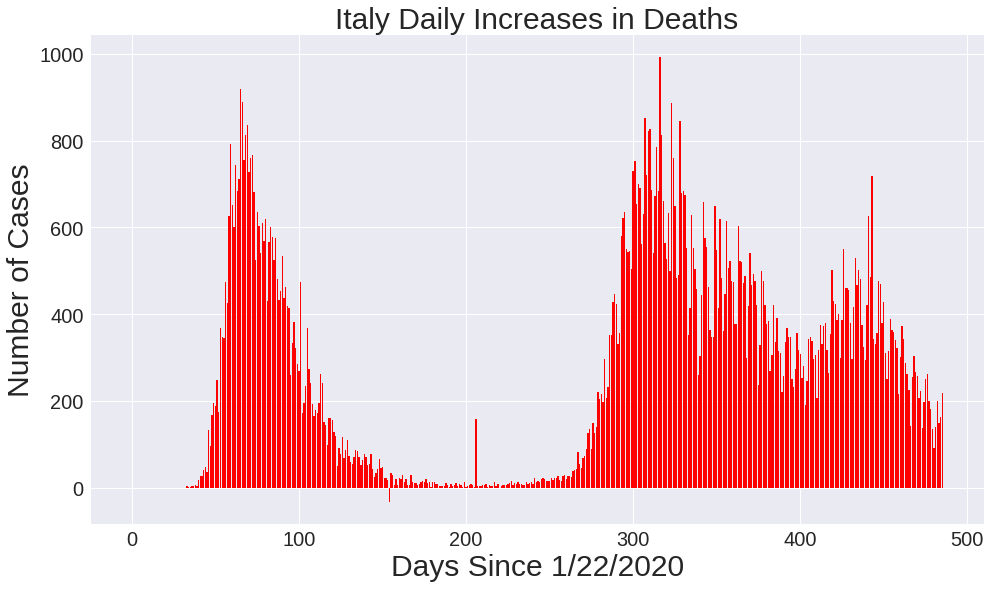

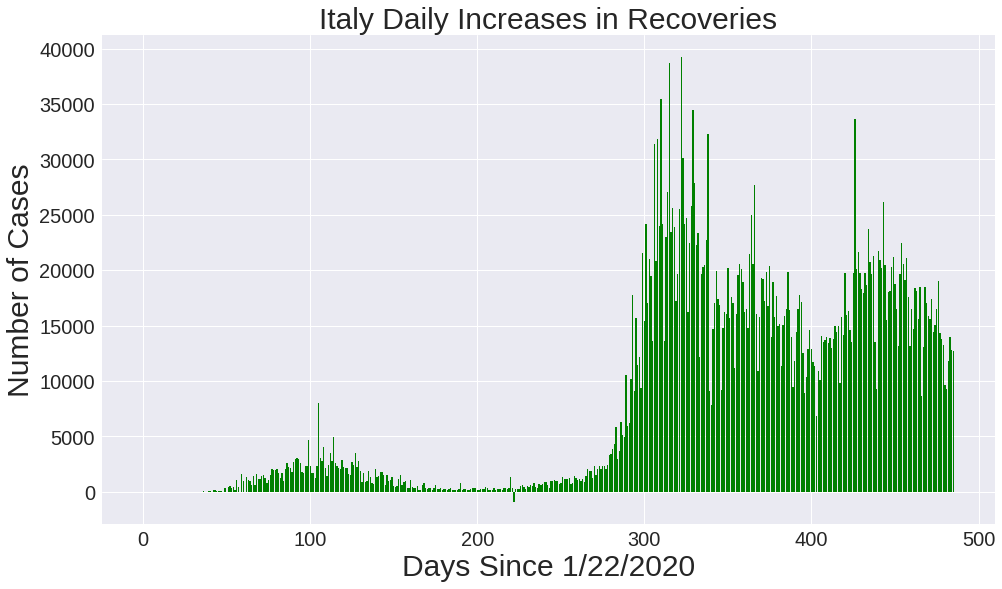

In [ ]:
country_plot(adjusted_dates, italy_cases, italy_daily_increase, italy_daily_death, italy_daily_recovery, 'Italy')

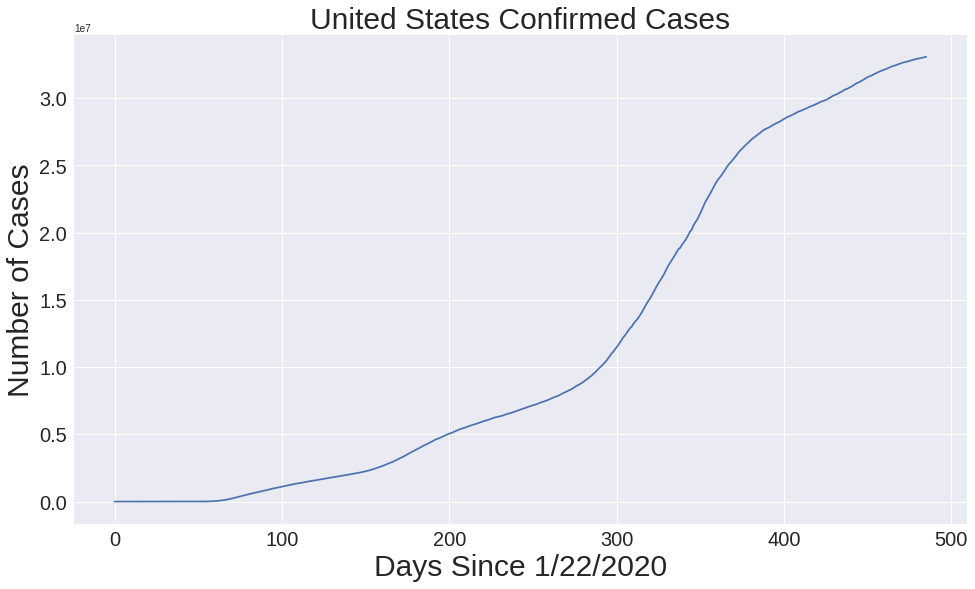

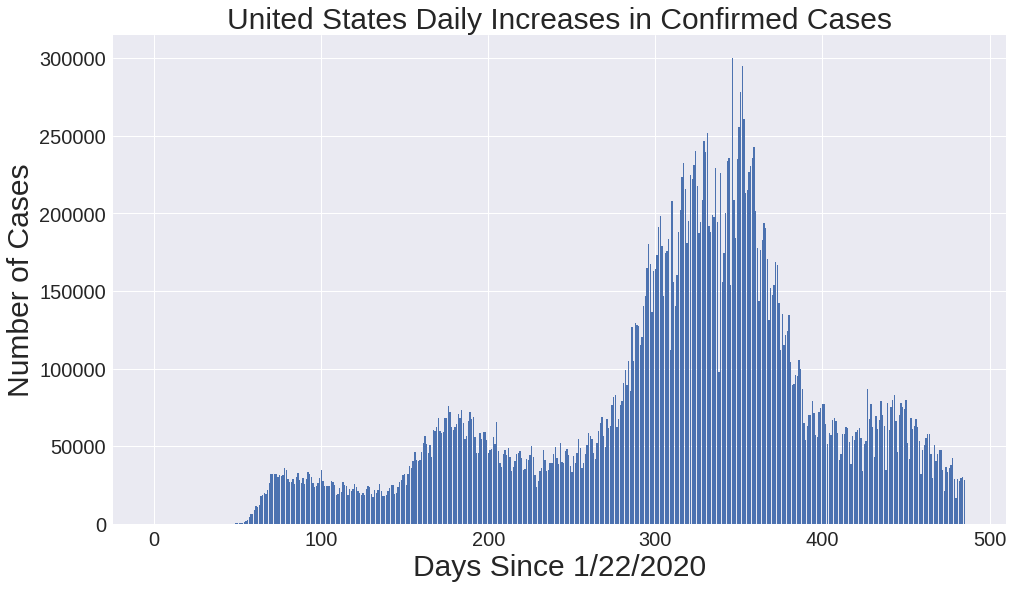

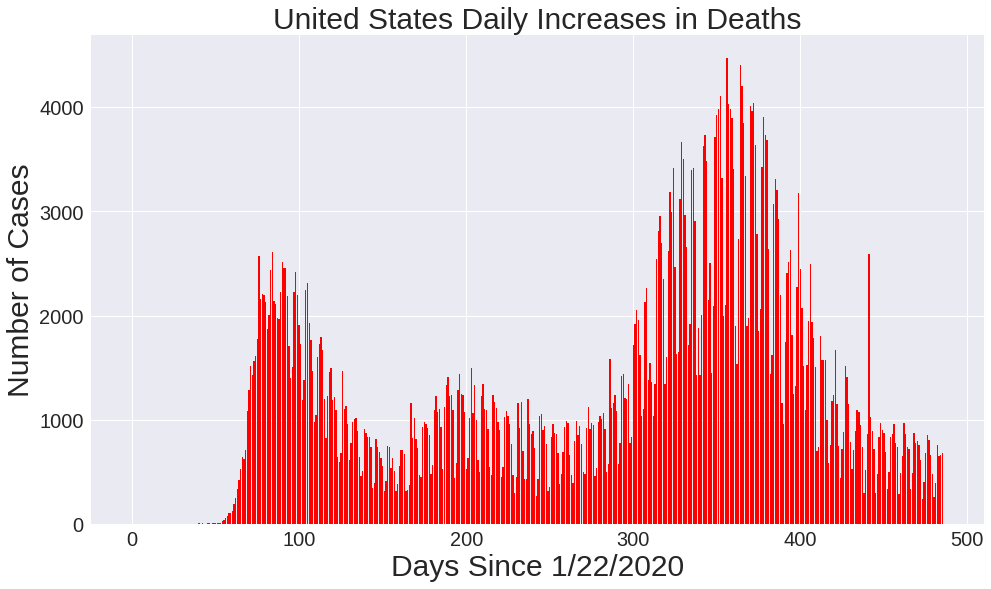

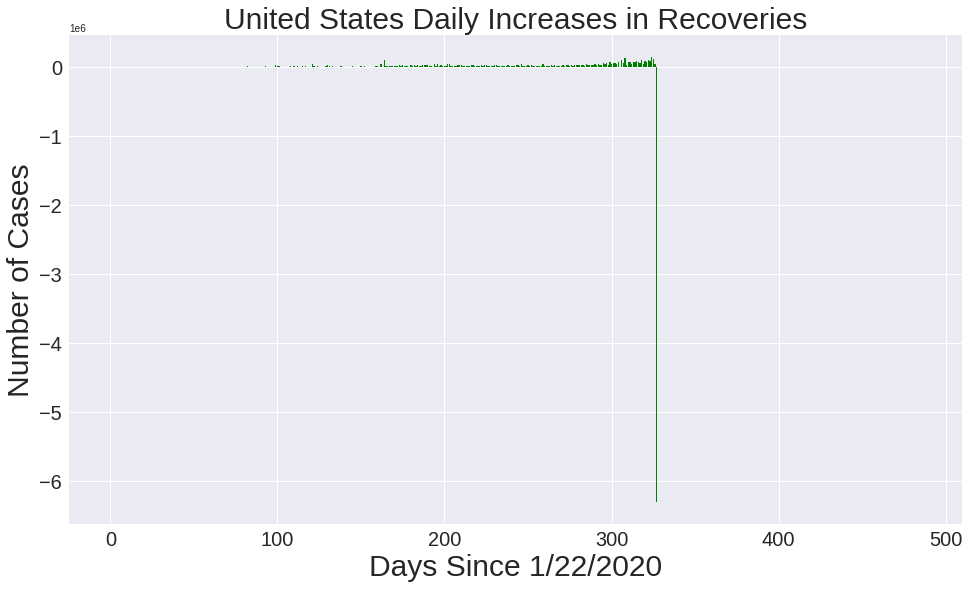

In [ ]:
country_plot(adjusted_dates, us_cases, us_daily_increase, us_daily_death, us_daily_recovery, 'United States')

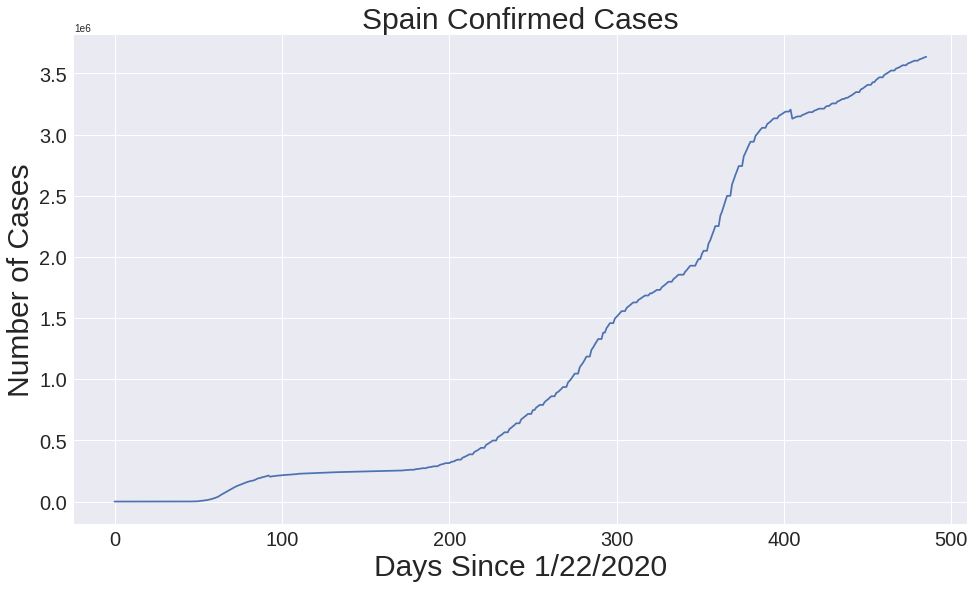

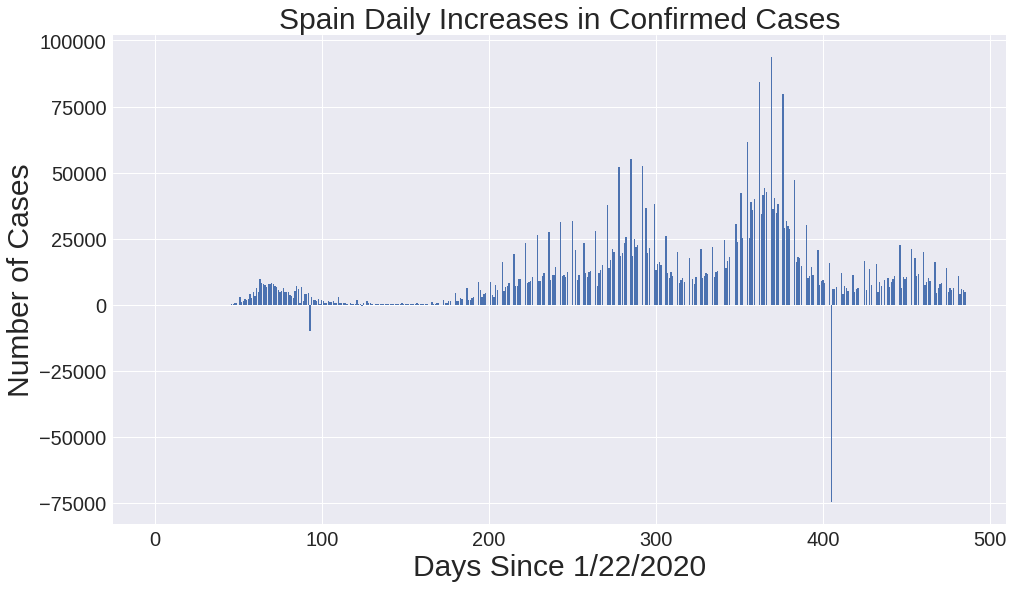

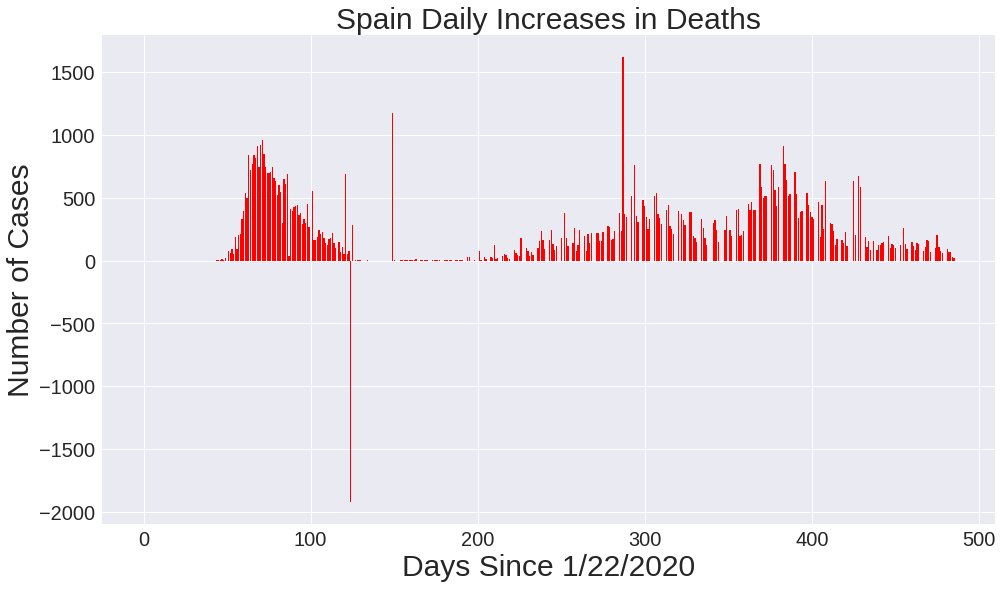

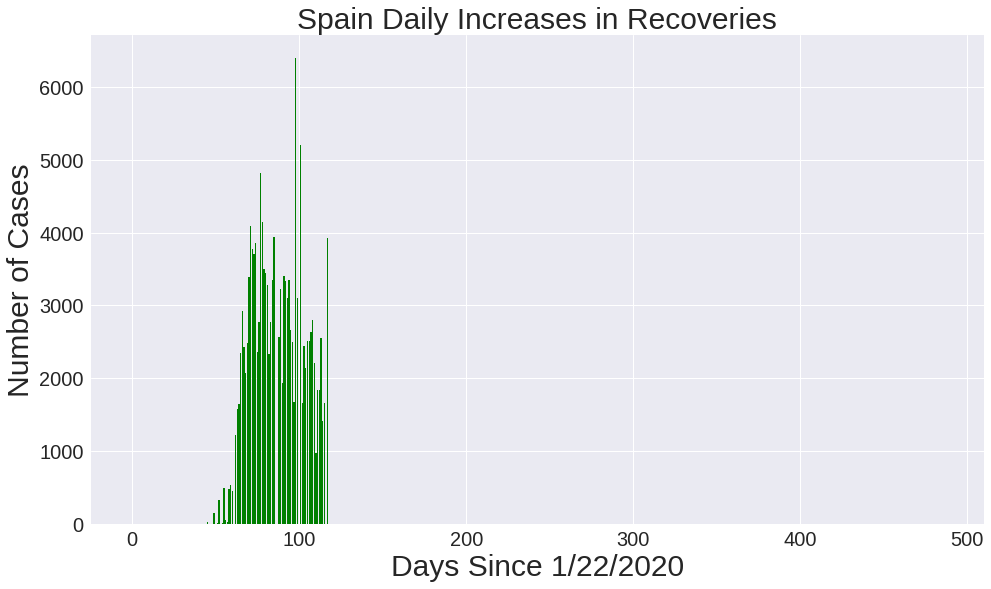

In [ ]:
country_plot(adjusted_dates, spain_cases, spain_daily_increase, spain_daily_death, spain_daily_recovery, 'Spain')

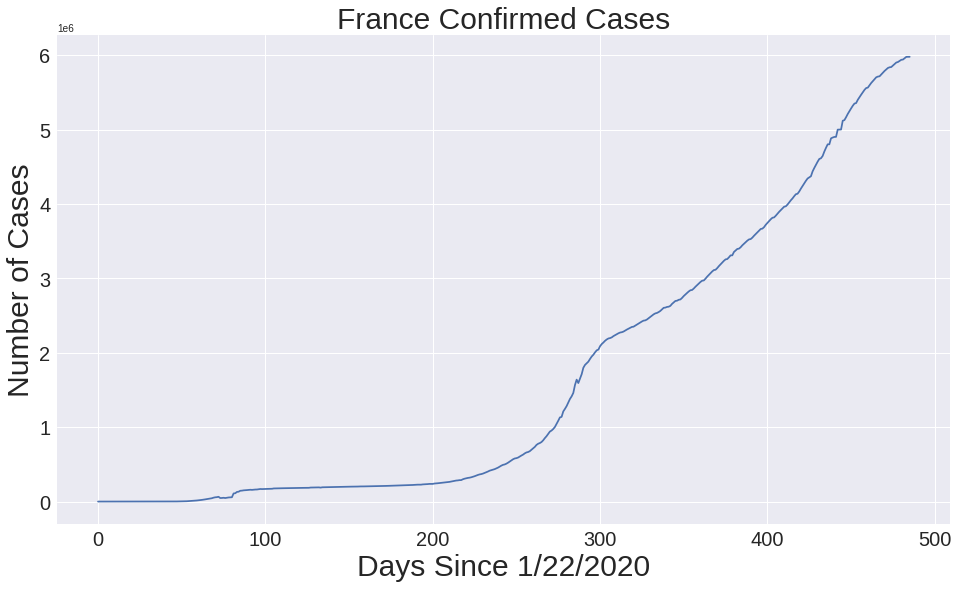

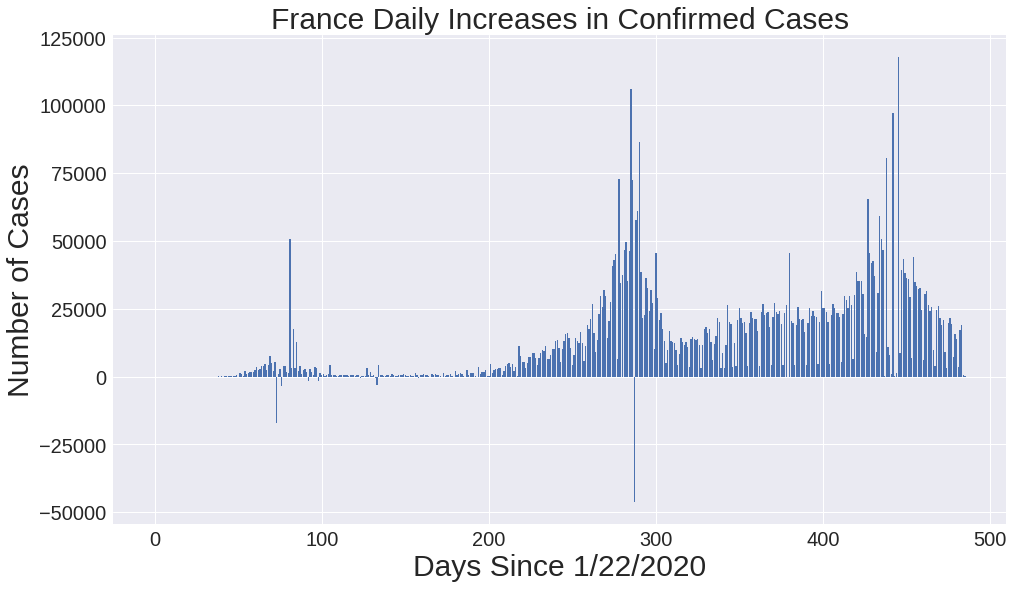

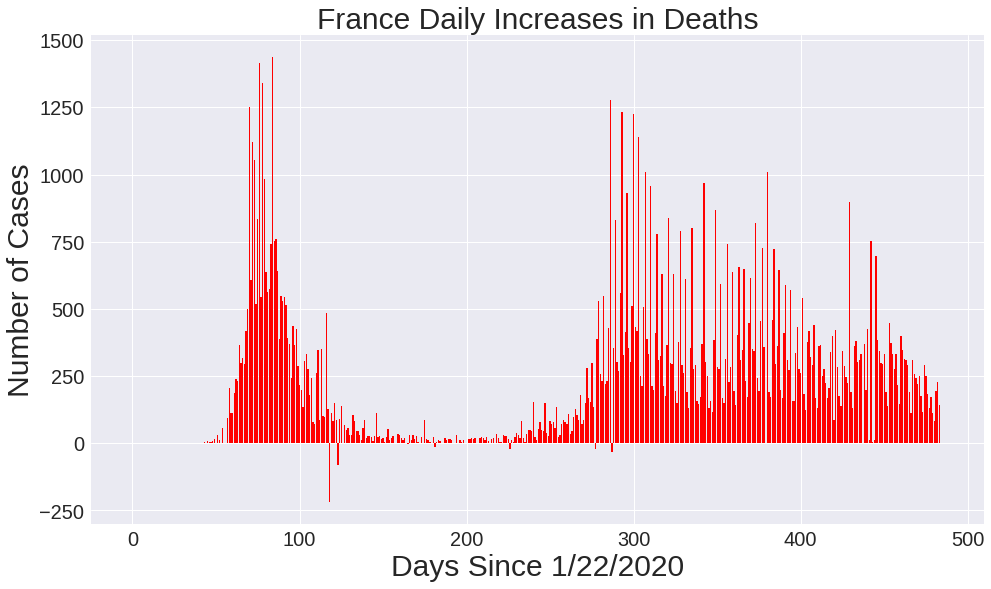

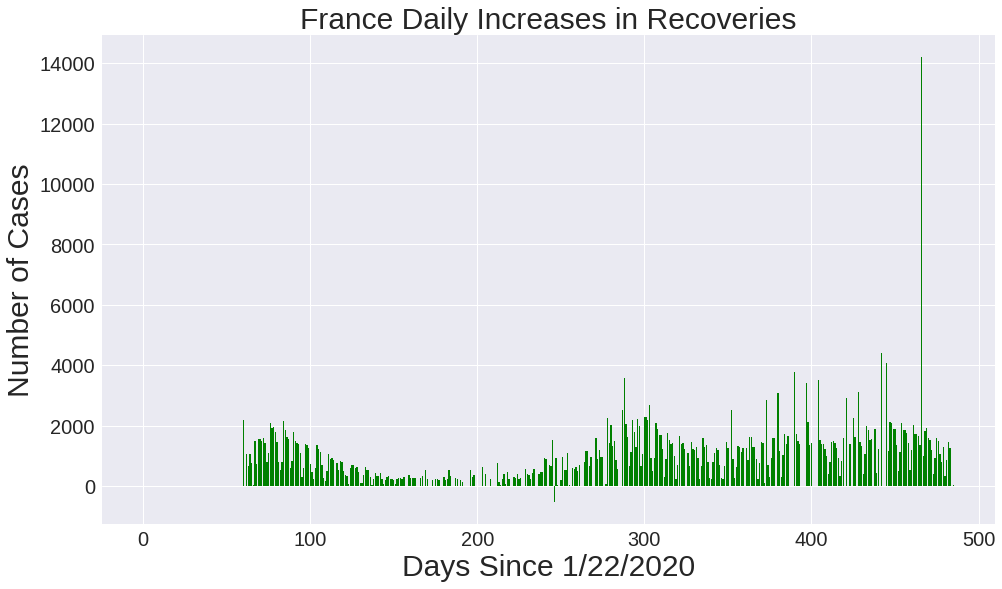

In [ ]:
country_plot(adjusted_dates, france_cases, france_daily_increase, france_daily_death, france_daily_recovery, 'France')

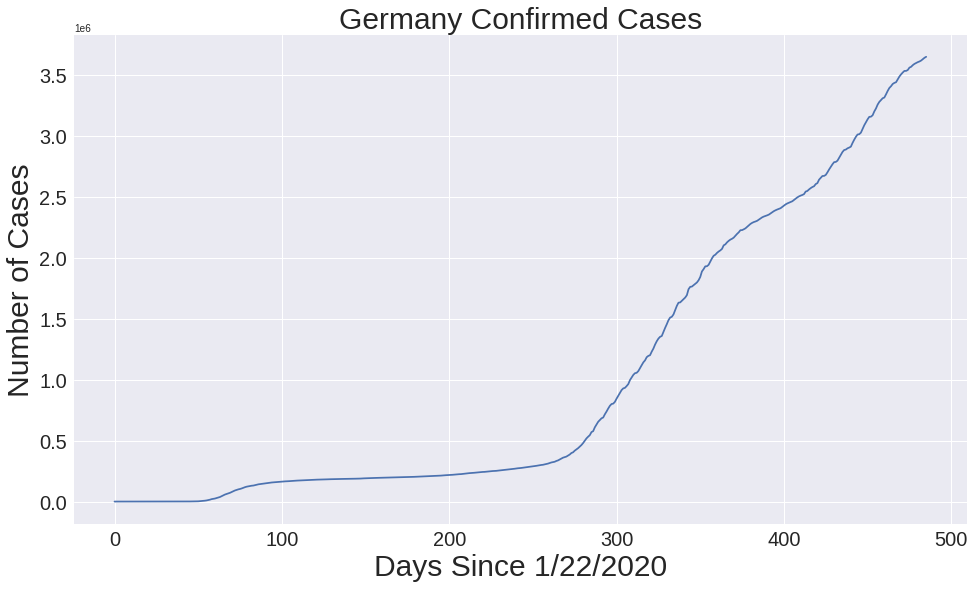

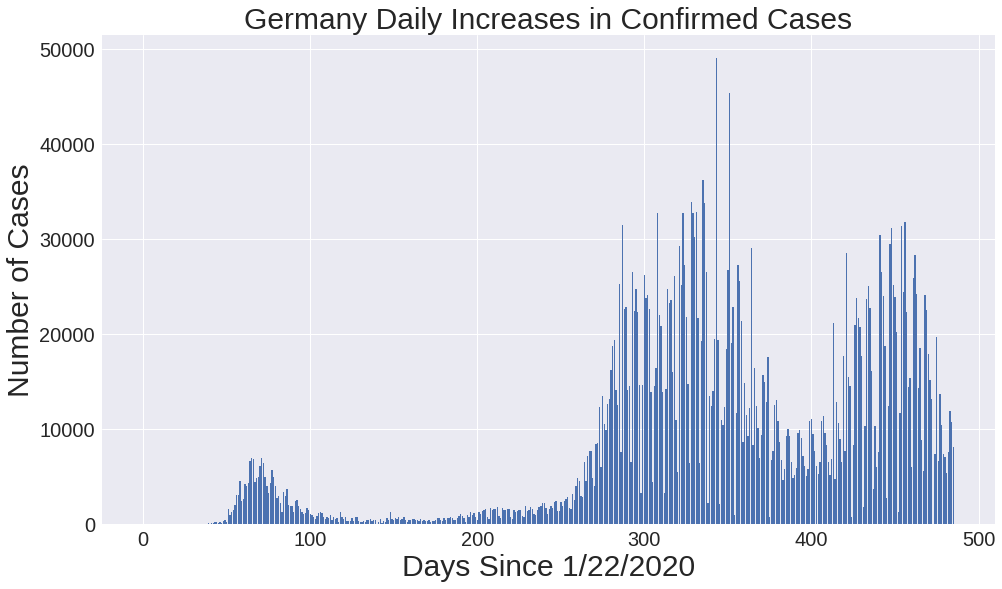

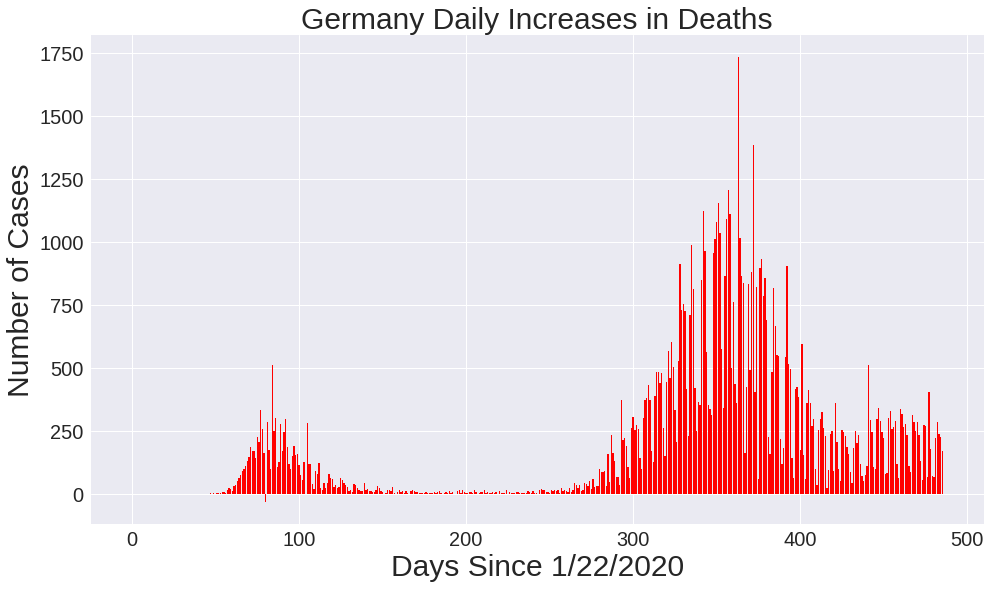

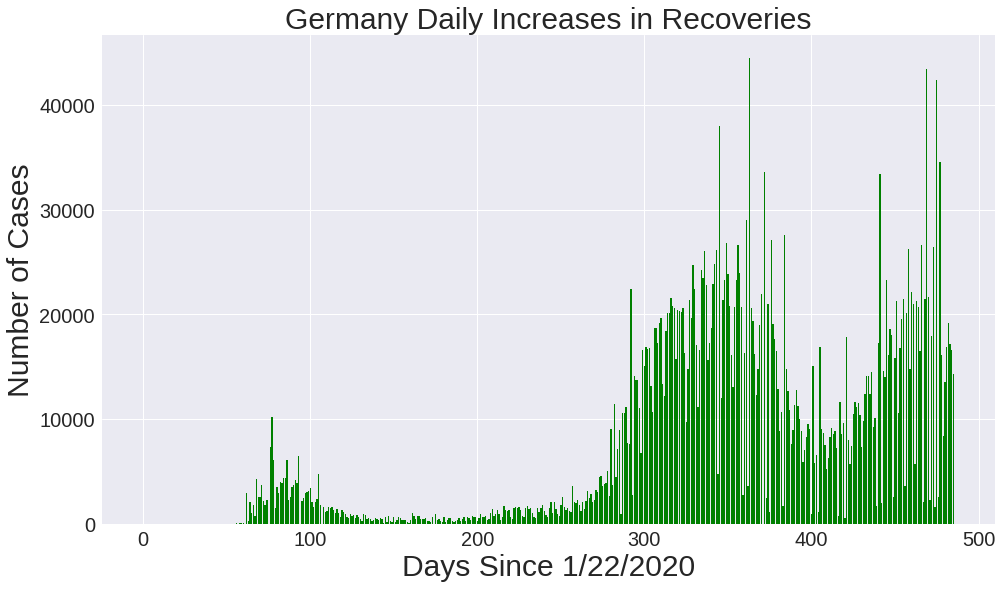

In [ ]:
country_plot(adjusted_dates, germany_cases, germany_daily_increase, germany_daily_death, germany_daily_recovery, 'Germany')

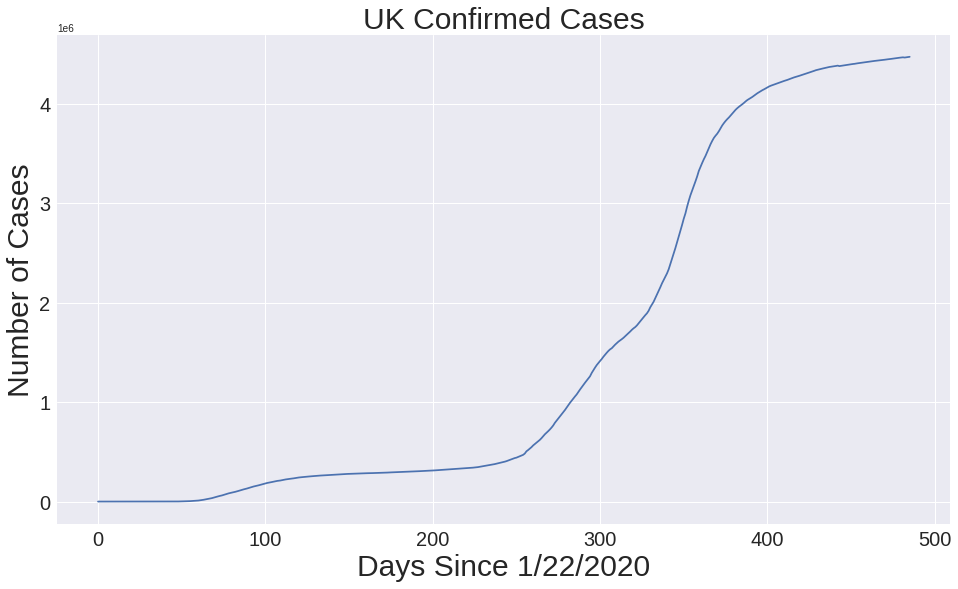

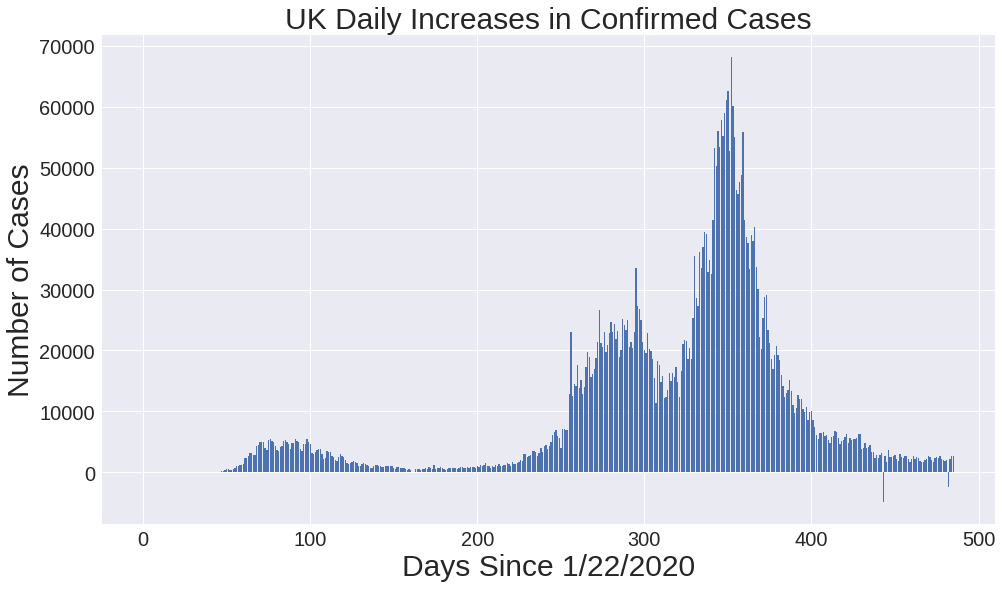

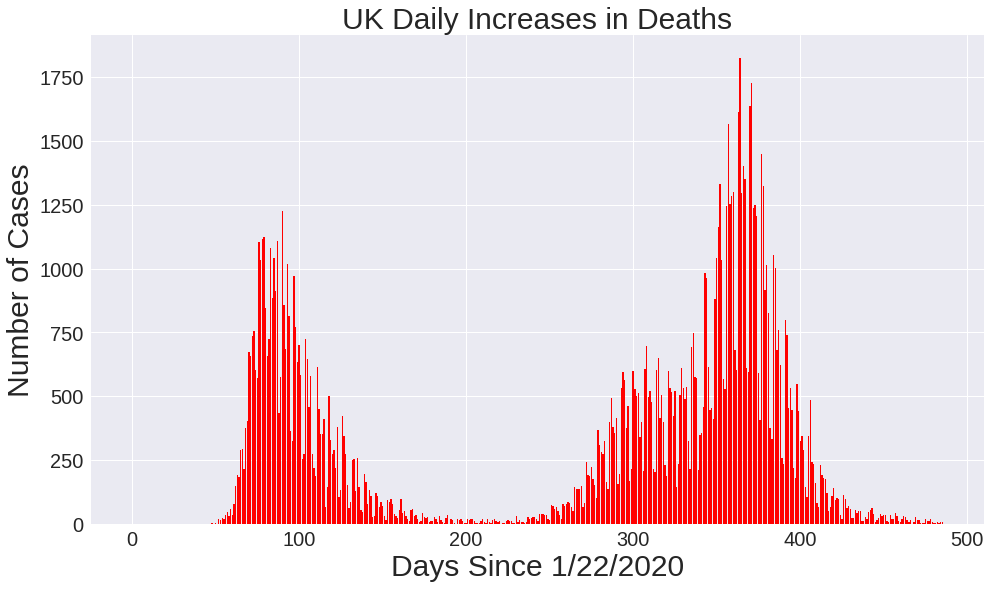

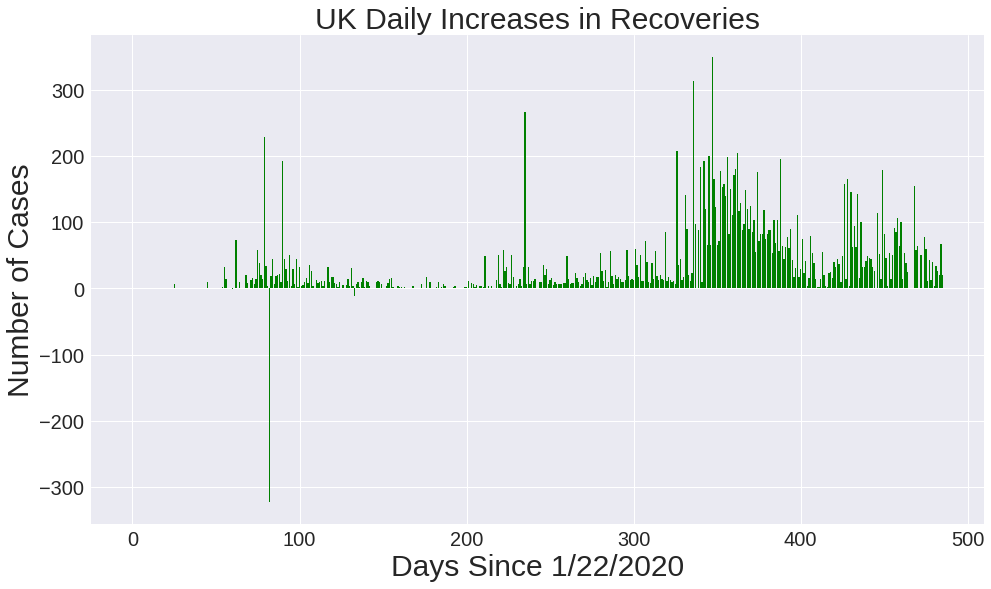

In [ ]:
country_plot(adjusted_dates, uk_cases, uk_daily_increase, uk_daily_death, uk_daily_recovery, 'UK')

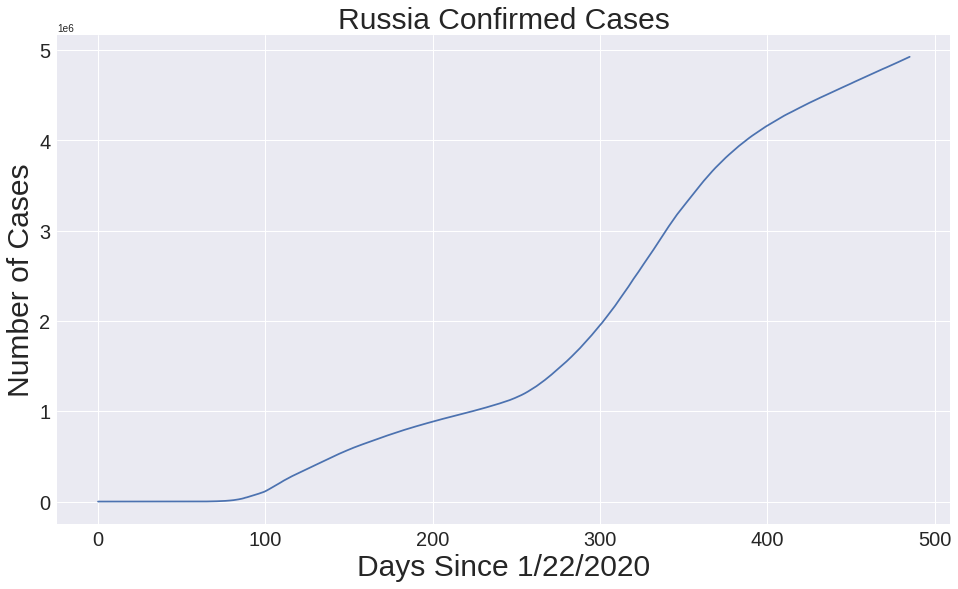

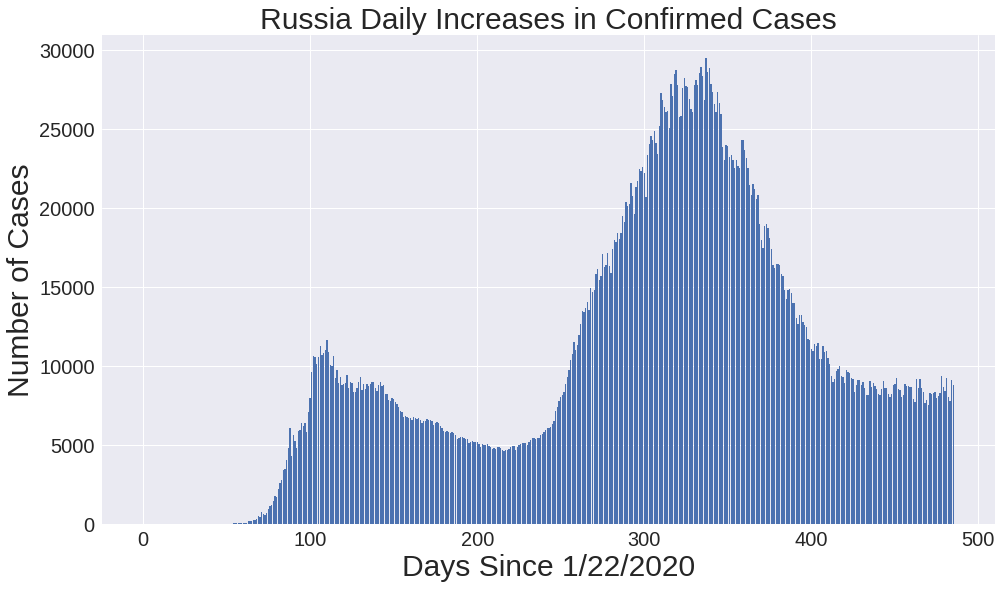

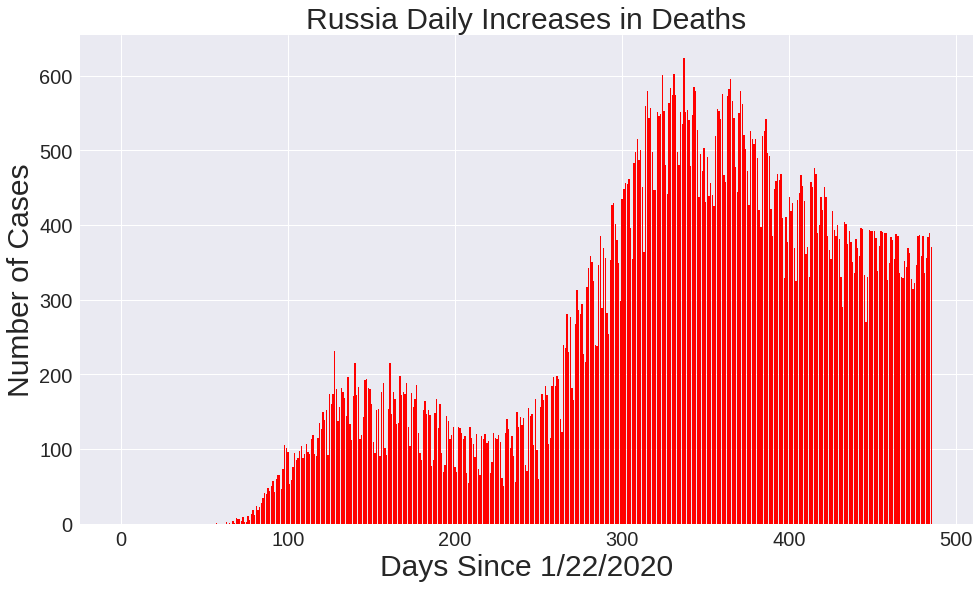

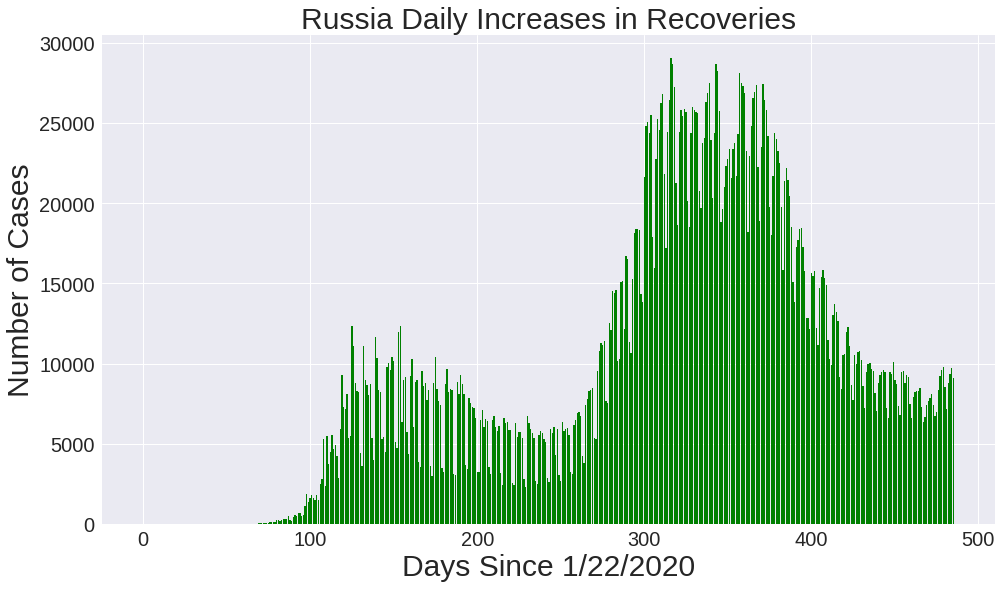

In [ ]:
country_plot(adjusted_dates, russia_cases, russia_daily_increase, russia_daily_death, russia_daily_recovery, 'Russia')

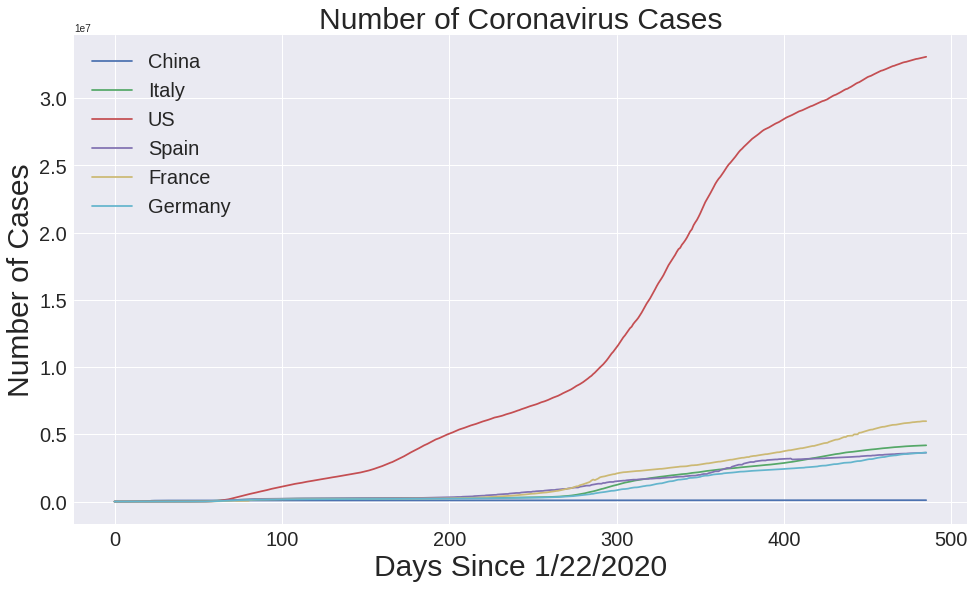

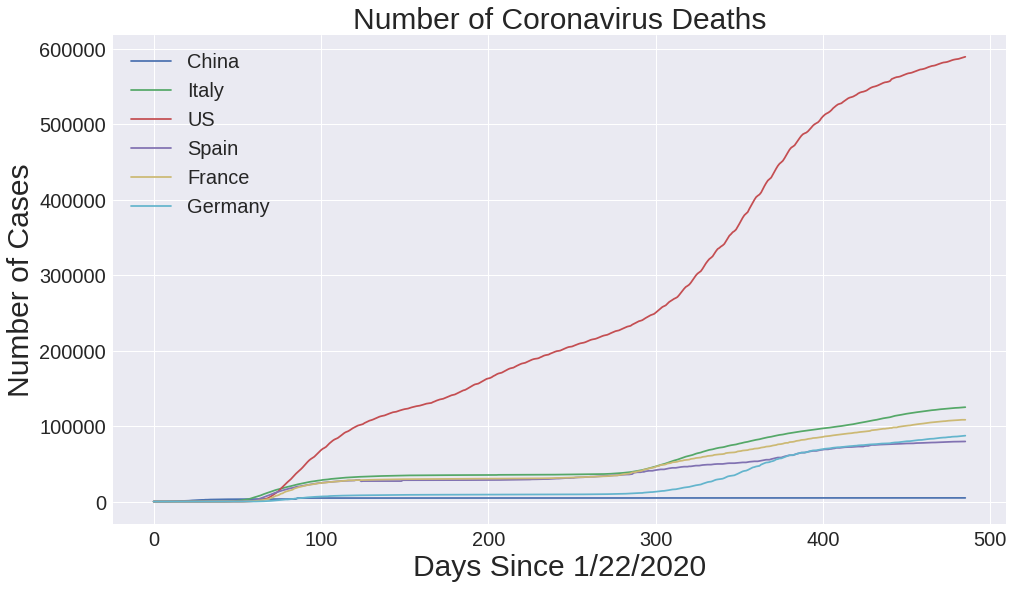

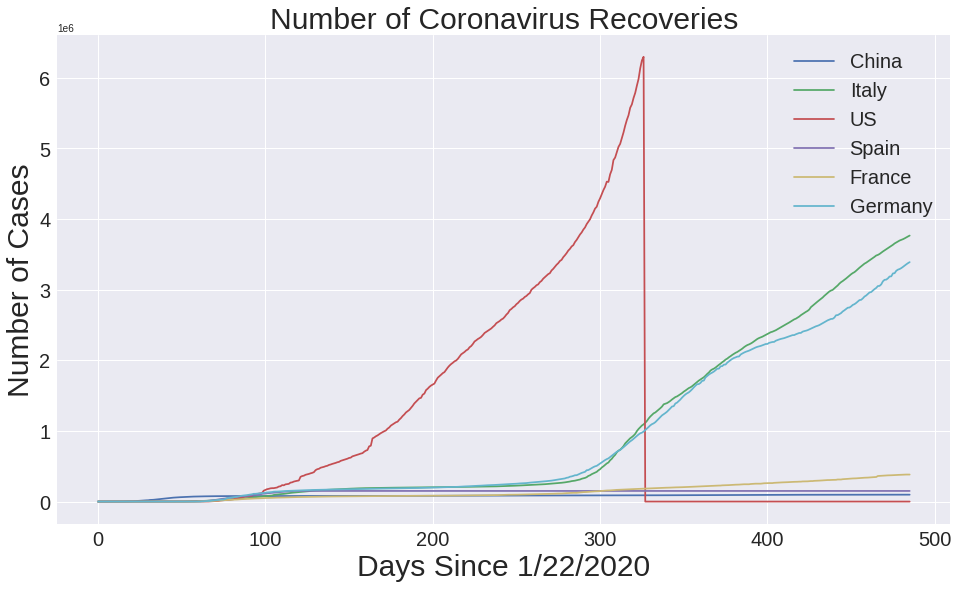

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, france_cases)
plt.plot(adjusted_dates, germany_cases)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, spain_deaths)
plt.plot(adjusted_dates, france_deaths)
plt.plot(adjusted_dates, germany_deaths)

plt.title('Number of Coronavirus Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, italy_recoveries)
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, spain_recoveries)
plt.plot(adjusted_dates, france_recoveries)
plt.plot(adjusted_dates, germany_recoveries)
plt.title('Number of Coronavirus Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France', 'Germany'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

### Predictions for confirmed coronavirus cases worldwide

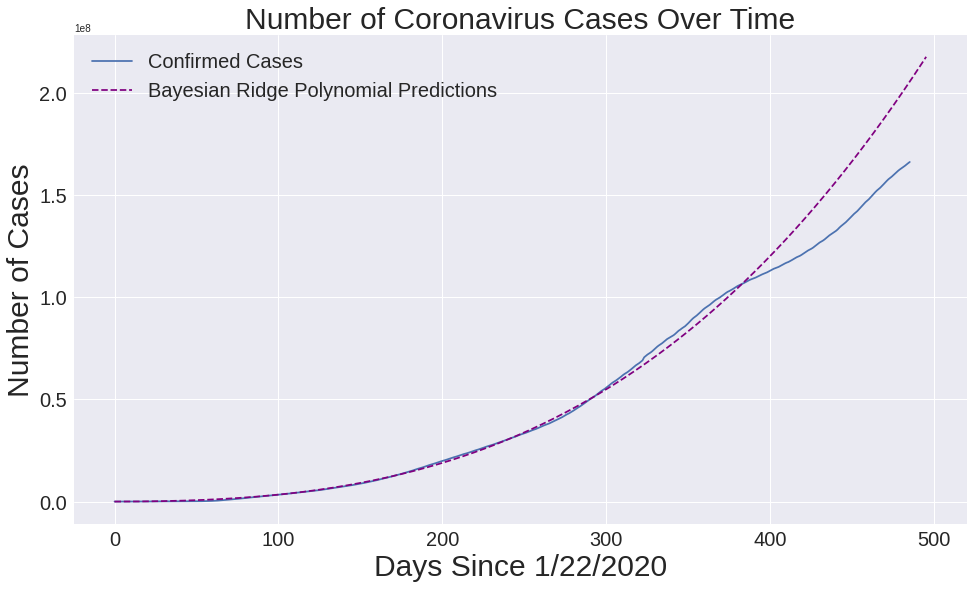

In [ ]:
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Polynomial Predictions', 'purple')

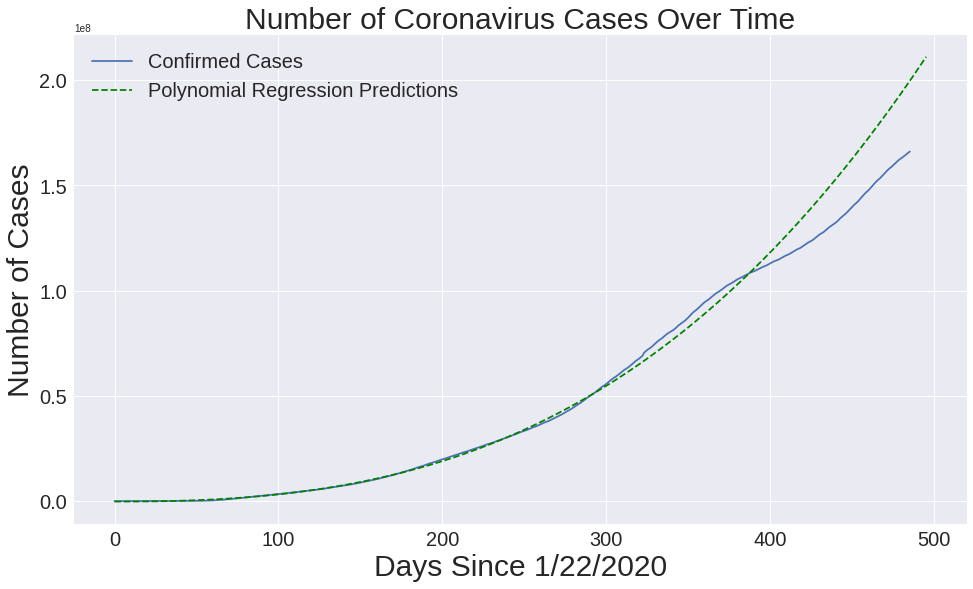

In [ ]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'green')

In [ ]:
# Future predictions using Bayesian Ridge 
bayesian_ridge_data_frame = pd.DataFrame({'Date': future_forecast_dates[-10:], 'Bayesian Regression Predicted Number of Confirmed Cases Worldwide': np.round(bayesian_pred[-10:])})
bayesian_ridge_data_frame

Date  Bayesian Regression Predicted Number of Confirmed Cases Worldwide
0  05/22/2021                                        206662788.0                
1  05/23/2021                                        207857953.0                
2  05/24/2021                                        209057772.0                
3  05/25/2021                                        210262252.0                
4  05/26/2021                                        211471405.0                
5  05/27/2021                                        212685240.0                
6  05/28/2021                                        213903766.0                
7  05/29/2021                                        215126993.0                
8  05/30/2021                                        216354931.0                
9  05/31/2021                                        217587589.0

In [ ]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
polynomial_regression_data_frame = pd.DataFrame({'Date': future_forecast_dates[-10:], 'Polynomial Predicted Number of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
polynomial_regression_data_frame


Date  Polynomial Predicted Number of Confirmed Cases Worldwide
0  05/22/2021                                        200804484.0       
1  05/23/2021                                        201936391.0       
2  05/24/2021                                        203072488.0       
3  05/25/2021                                        204212784.0       
4  05/26/2021                                        205357287.0       
5  05/27/2021                                        206506004.0       
6  05/28/2021                                        207658942.0       
7  05/29/2021                                        208816109.0       
8  05/30/2021                                        209977514.0       
9  05/31/2021                                        211143162.0

### Mortality Rate (worldwide) overtime susceptible to change

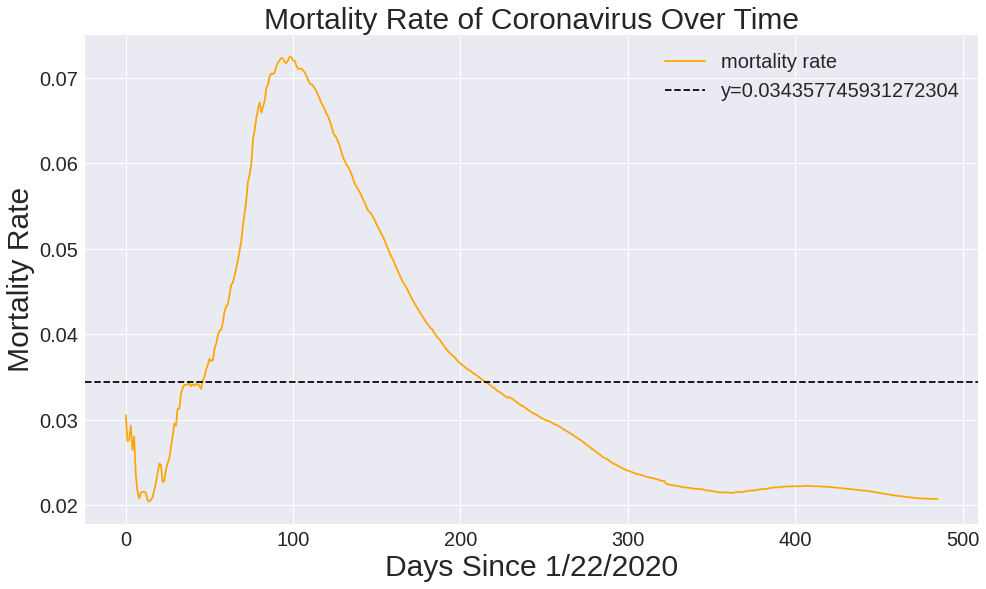

In [ ]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### Recovery Rate (worldwide) suceptible to change


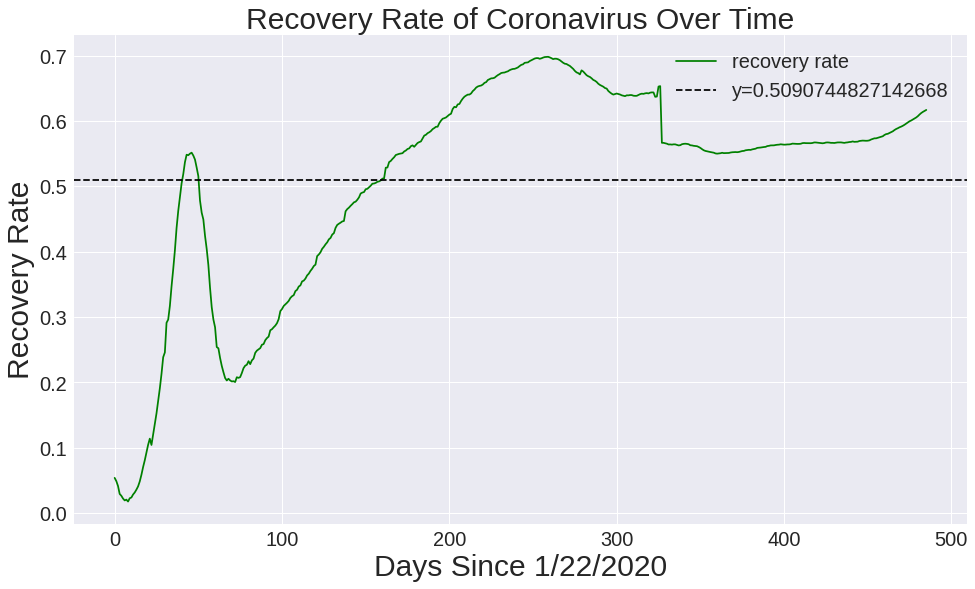

In [ ]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, recovery_rate, color='green')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### Graphing deaths against recoveries

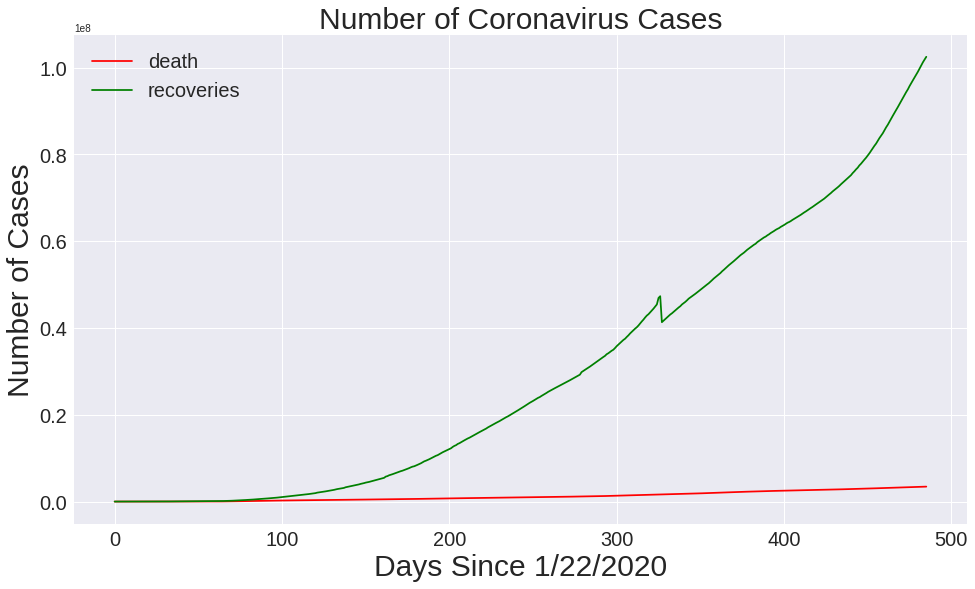

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### Plotting the number of deaths against the number of recoveries

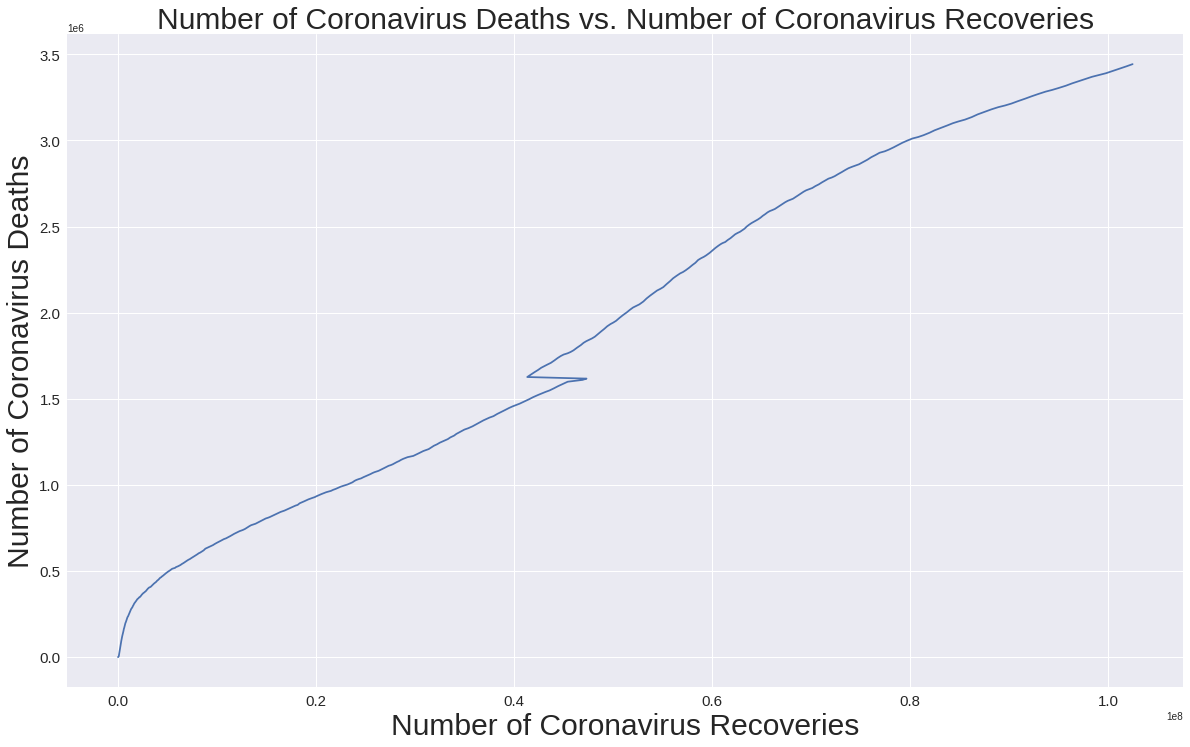

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Number of Coronavirus Recoveries', size=30)
plt.ylabel('Number of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

### Getting information about countries/regions that have confirmed coronavirus cases

In [ ]:
unique_countries =  list(latest_data['Country_Region'].unique())

In [ ]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

### Country Data table

In [ ]:
country_data_frame = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases, 
                          'Number of Active Cases' : country_active_cases,
                          'Mortality Rate': country_mortality_rate})

# number of cases per country/region

country_data_frame.style.background_gradient(cmap='Greens')

### Getting the latest information about provinces/states that have confirmed coronavirus cases

In [ ]:
unique_provinces =  list(latest_data['Province_State'].unique())

In [ ]:
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
province_recovery_cases = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [ ]:
# number of cases per province/state/city
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': province_country, 'Number of Confirmed Cases': province_confirmed_cases,
                          'Number of Deaths': province_death_cases, 'Number of Recoveries' : province_recovery_cases,
                          'Mortality Rate': province_mortality_rate})
# number of cases per country/region

province_df.style.background_gradient(cmap='Greens')

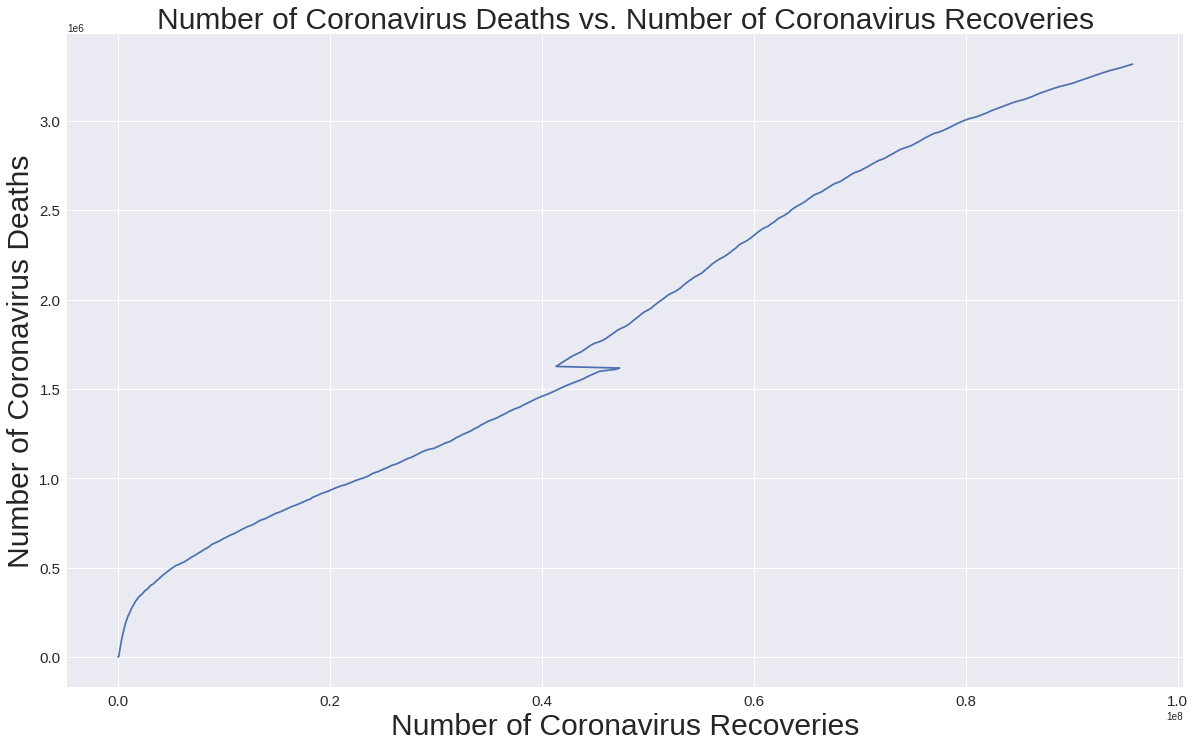

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Number of Coronavirus Recoveries', size=30)
plt.ylabel('Number of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [ ]:
print('Bayesian regression future predictions:')

list(zip(future_forecast_dates[-10:], bayesian_pred[-10:]))

Bayesian regression future predictions:


[('05/22/2021', 206662787.7317111),
 ('05/23/2021', 207857953.2110895),
 ('05/24/2021', 209057771.51959965),
 ('05/25/2021', 210262252.29123107),
 ('05/26/2021', 211471405.16380715),
 ('05/27/2021', 212685239.77898532),
 ('05/28/2021', 213903765.78225717),
 ('05/29/2021', 215126992.82294828),
 ('05/30/2021', 216354930.55421832),
 ('05/31/2021', 217587588.6330609)]

In [ ]:
print('Linear regression future predictions:')

list(zip(future_forecast_dates[-10:], linear_pred[-10:]))

Linear regression future predictions:


[('05/22/2021', 200804484.06799096),
 ('05/23/2021', 201936390.5296739),
 ('05/24/2021', 203072488.080323),
 ('05/25/2021', 204212784.34974924),
 ('05/26/2021', 205357286.96776354),
 ('05/27/2021', 206506003.5641769),
 ('05/28/2021', 207658941.76880026),
 ('05/29/2021', 208816109.21144468),
 ('05/30/2021', 209977513.5219211),
 ('05/31/2021', 211143162.33004045)]

### Total deaths over time

### Coronavirus Cases Recovered over time

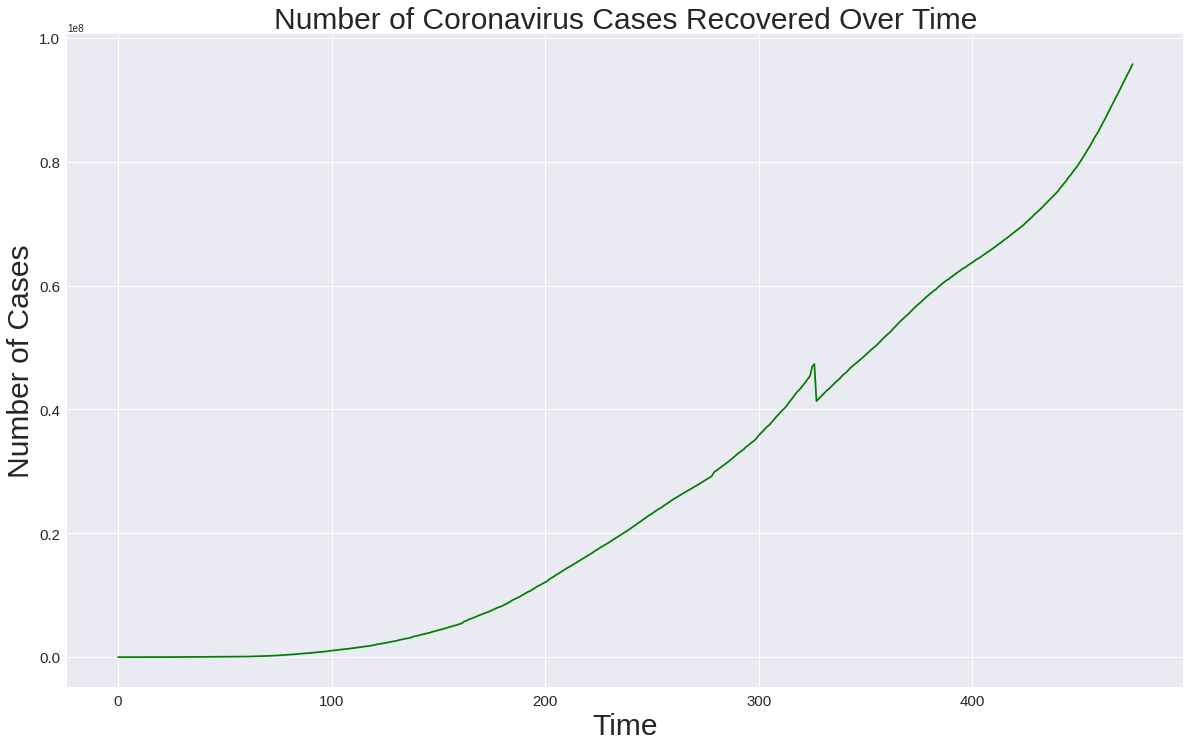

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

### Number of Coronavirus Recovered vs Number of Deaths

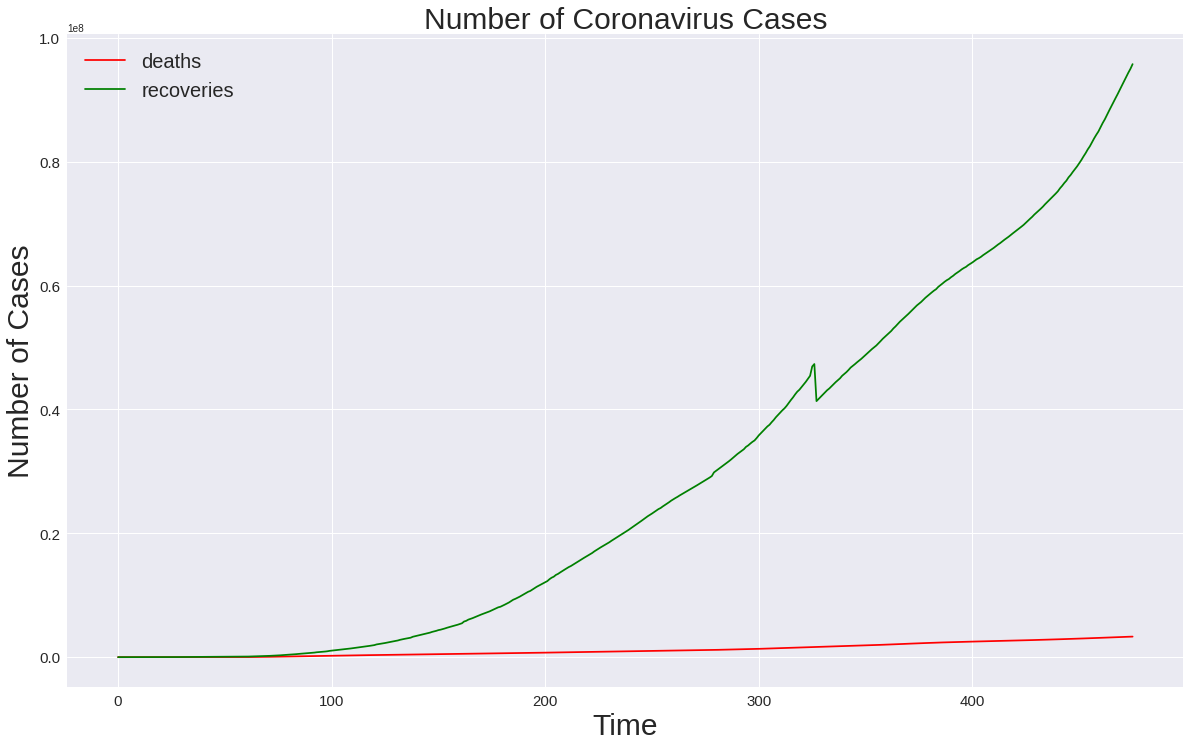

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['deaths', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

### Coronavirus Recoveries vs Deaths

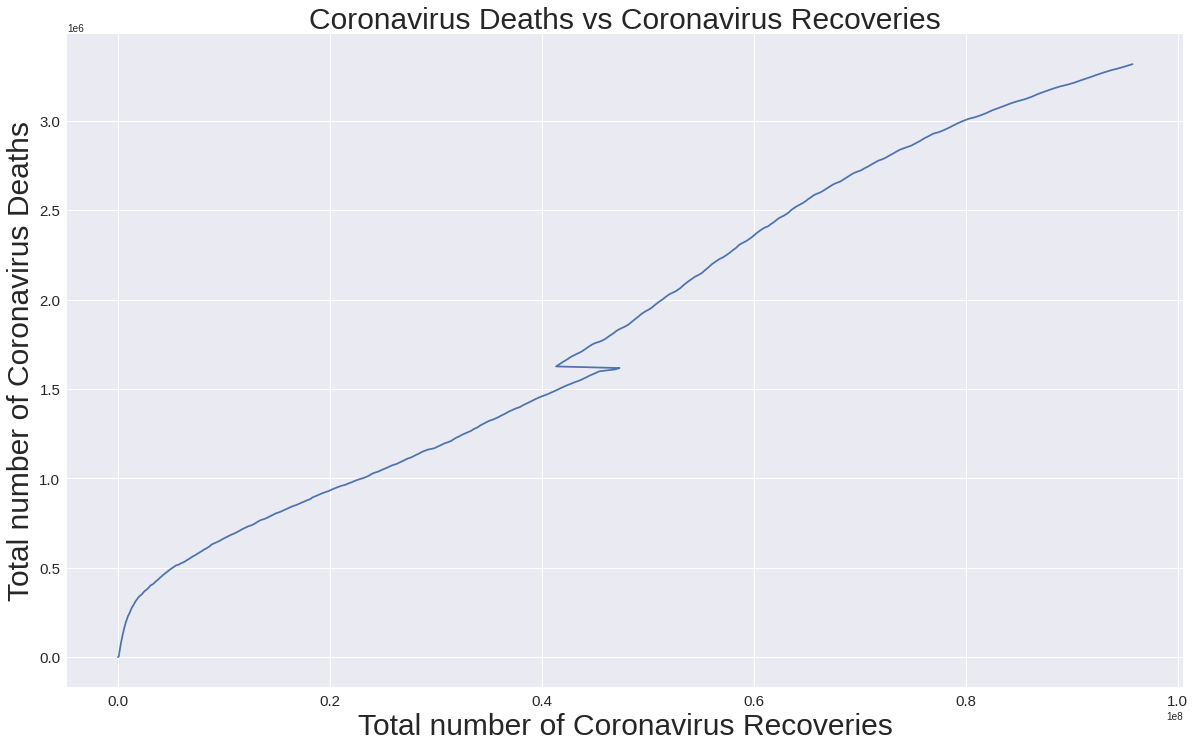

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('Coronavirus Deaths vs Coronavirus Recoveries', size=30)
plt.xlabel('Total number of Coronavirus Recoveries', size=30)
plt.ylabel('Total number of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()